In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from lazypredict.Supervised import LazyClassifier

In [187]:
data = pd.read_csv("fraud_oracle.csv")
data.head(5)

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [188]:
print('Number of duplicates:', data.duplicated().sum() )
#there is no duplicated data

Number of duplicates: 0


In [189]:
data.notnull()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0       True         True       True  True          True              True   
1       True         True       True  True          True              True   
2       True         True       True  True          True              True   
3       True         True       True  True          True              True   
4       True         True       True  True          True              True   
...      ...          ...        ...   ...           ...               ...   
15415   True         True       True  True          True              True   
15416   True         True       True  True          True              True   
15417   True         True       True  True          True              True   
15418   True         True       True  True          True              True   
15419   True         True       True  True          True              True   

       MonthClaimed  WeekOfMonthClaimed   Sex  MaritalStatus  ...  \
0              True                True  True           True  ...   
1              True                True  True           True  ...   
2              True                True  True           True  ...   
3              True                True  True           True  ...   
4              True                True  True           True  ...   
...             ...                 ...   ...            ...  ...   
15415          True                True  True           True  ...   
15416          True                True  True           True  ...   
15417          True                True  True           True  ...   
15418          True                True  True           True  ...   
15419          True                True  True           True  ...   

       AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  \
0              True               True               True            True   
1              True               True               True            True   
2              True               True               True            True   
3              True               True               True            True   
4              True               True               True            True   
...             ...                ...                ...             ...   
15415          True               True               True            True   
15416          True               True               True            True   
15417          True               True               True            True   
15418          True               True               True            True   
15419          True               True               True            True   

       AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  \
0           True                 True                 True          True   
1           True                 True                 True          True   
2           True                 True                 True          True   
3           True                 True                 True          True   
4           True                 True                 True          True   
...          ...                  ...                  ...           ...   
15415       True                 True                 True          True   
15416       True                 True                 True          True   
15417       True                 True                 True          True   
15418       True                 True                 True          True   
15419       True                 True                 True          True   

       Year  BasePolicy  
0      True        True  
1      True        True  
2      True        True  
3      True        True  
4      True        True  
...     ...         ...  
15415  True        True  
15416  True        True  
15417  True        True  
15418  True        True  
15419  True        True  

[15420 rows x 33 columns]

In [190]:
# Check for the number of rows and columns in the dataset
data.shape

(15420, 33)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [192]:
#Check if there are any null values in the dataset
data.notnull()
nan_counts = data.isna().sum()
print(nan_counts)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [193]:
# Observing the statistical characteristics of the dataset 
data.describe()

WeekOfMonth  WeekOfMonthClaimed      Age  FraudFound_P  PolicyNumber  \
count     15420.00            15420.00 15420.00      15420.00      15420.00   
mean          2.79                2.69    39.86          0.06       7710.50   
std           1.29                1.26    13.49          0.24       4451.51   
min           1.00                1.00     0.00          0.00          1.00   
25%           2.00                2.00    31.00          0.00       3855.75   
50%           3.00                3.00    38.00          0.00       7710.50   
75%           4.00                4.00    48.00          0.00      11565.25   
max           5.00                5.00    80.00          1.00      15420.00   

       RepNumber  Deductible  DriverRating     Year  
count   15420.00    15420.00      15420.00 15420.00  
mean        8.48      407.70          2.49  1994.87  
std         4.60       43.95          1.12     0.80  
min         1.00      300.00          1.00  1994.00  
25%         5.00      400.00          1.00  1994.00  
50%         8.00      400.00          2.00  1995.00  
75%        12.00      400.00          3.00  1996.00  
max        16.00      700.00          4.00  1996.00

In [194]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

numerical_data_summary = data[numerical_columns].describe()

numerical_columns, numerical_data_summary


(Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
        'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
       dtype='object'),
        WeekOfMonth  WeekOfMonthClaimed      Age  FraudFound_P  PolicyNumber  \
 count     15420.00            15420.00 15420.00      15420.00      15420.00   
 mean          2.79                2.69    39.86          0.06       7710.50   
 std           1.29                1.26    13.49          0.24       4451.51   
 min           1.00                1.00     0.00          0.00          1.00   
 25%           2.00                2.00    31.00          0.00       3855.75   
 50%           3.00                3.00    38.00          0.00       7710.50   
 75%           4.00                4.00    48.00          0.00      11565.25   
 max           5.00                5.00    80.00          1.00      15420.00   
 
        RepNumber  Deductible  DriverRating     Year  
 count   15420.00    15420.00      15420.00 15420.00  


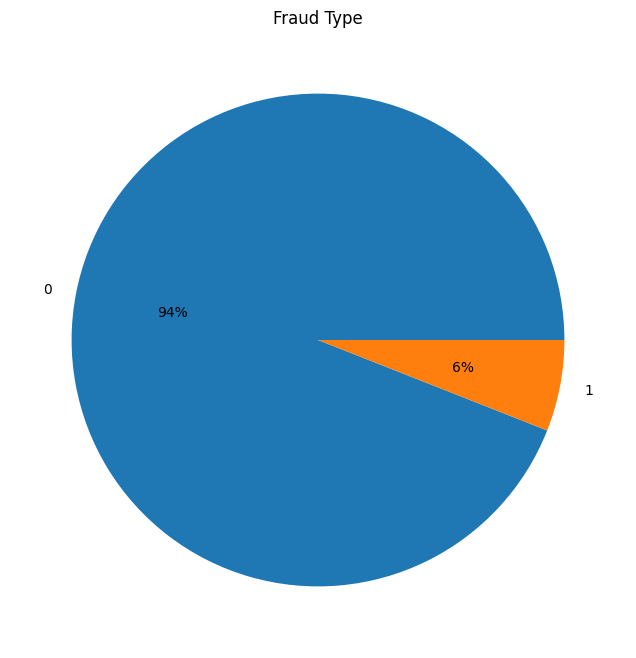

In [195]:
plt.figure(figsize=(10,8))
plt.pie(data.FraudFound_P.value_counts().values,labels=data.FraudFound_P.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()
#Only 6% of Claims are detected as Fraud and since this is the target feature, shows the dataset is extremely imbalanced

<Axes: title={'center': 'Unique values per feature'}>

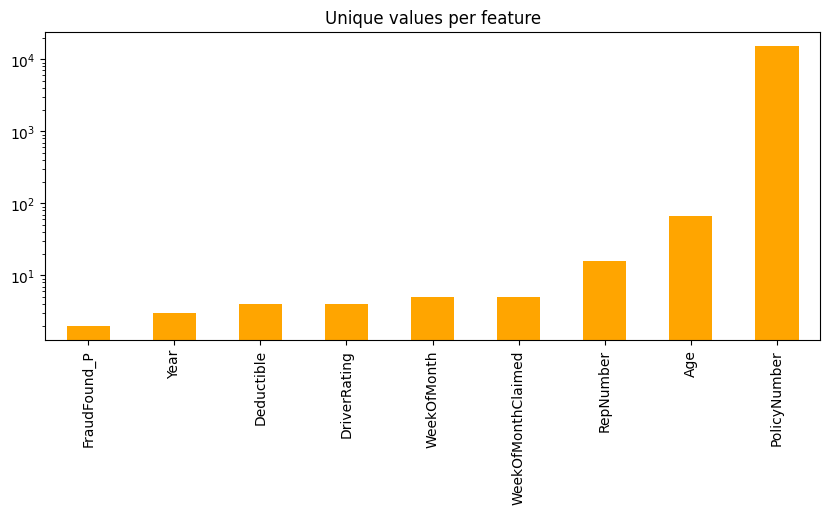

In [196]:
# Find out the number of unique values of the categorical features 
unique_values_cat = data.select_dtypes(
  include= "object").nunique().sort_values()

# Find out the number of unique values of the numerical features 
unique_values_con = data.select_dtypes(
  include= "number").nunique().sort_values()

# Plot a countplot of the unique values per numerical feature
unique_values_con.plot.bar(logy=True, figsize=(10, 4),
                       title="Unique values per feature", color= 'orange')

<Axes: title={'center': 'Unique values per feature'}>

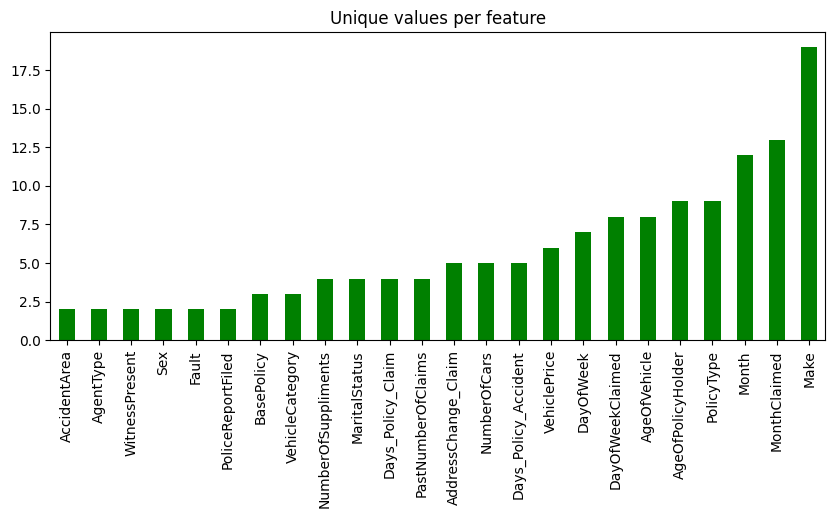

In [197]:
# Plot a countplot of the unique values per categorical feature
unique_values_cat.plot.bar( figsize=(10, 4),
                       title="Unique values per feature", color= 'green')

#we can use this plot for encoding

In [198]:
data.drop('PolicyNumber', axis = 1, inplace = True)

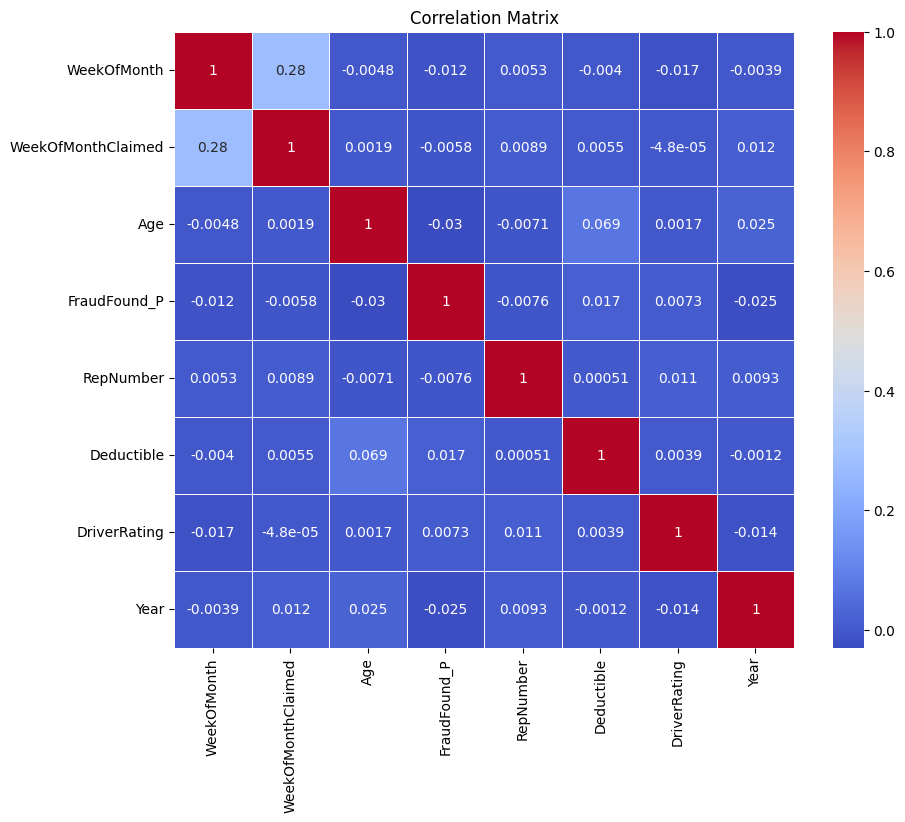

In [199]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

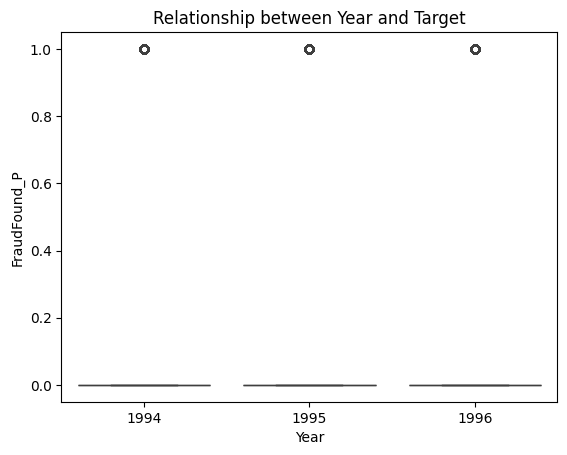

In [200]:
sns.boxplot(x=data['Year'], y=data['FraudFound_P'])  
plt.title("Relationship between Year and Target")
plt.show()

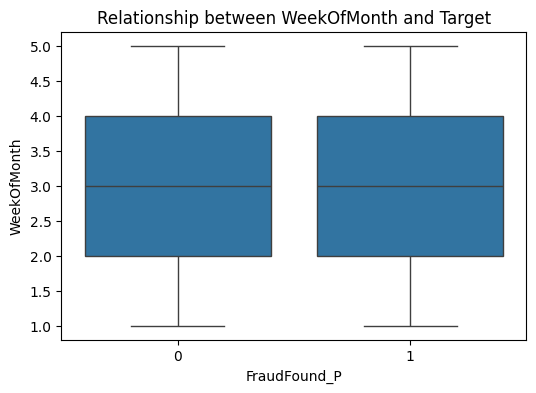

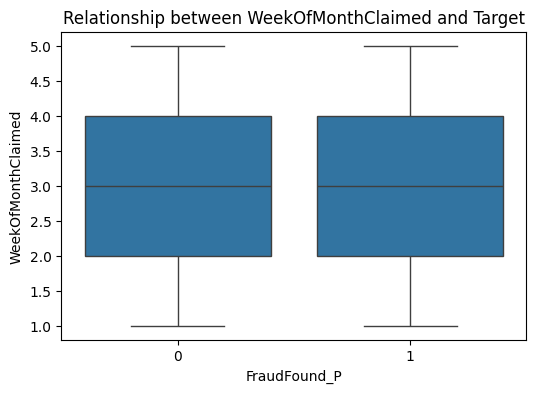

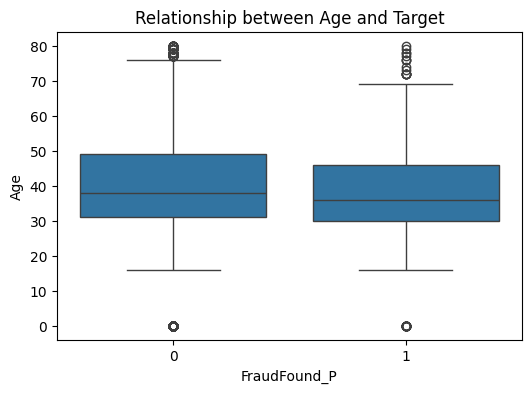

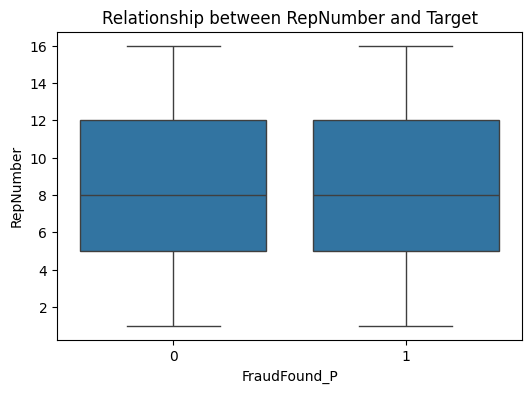

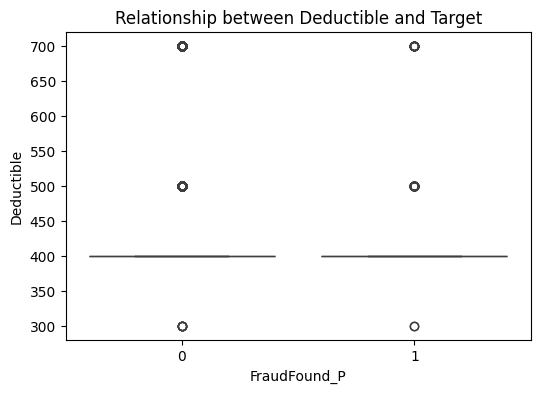

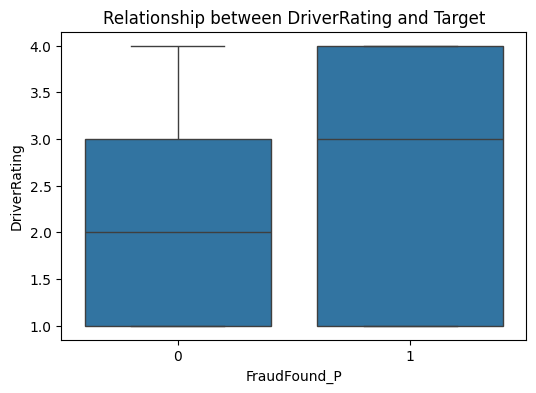

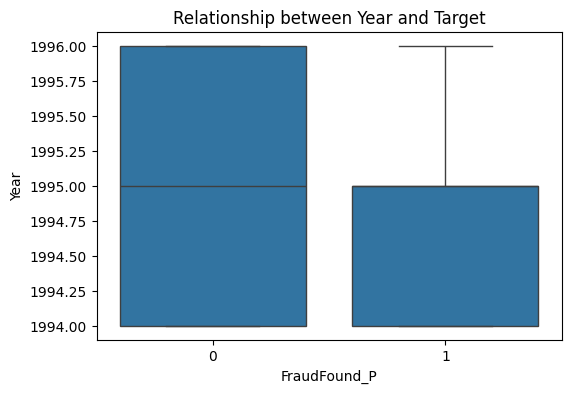

In [201]:
numerical_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 
                        'RepNumber', 'Deductible', 'DriverRating', 'Year']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data['FraudFound_P'], y=data[col])
    plt.title(f"Relationship between {col} and Target")
    plt.show()

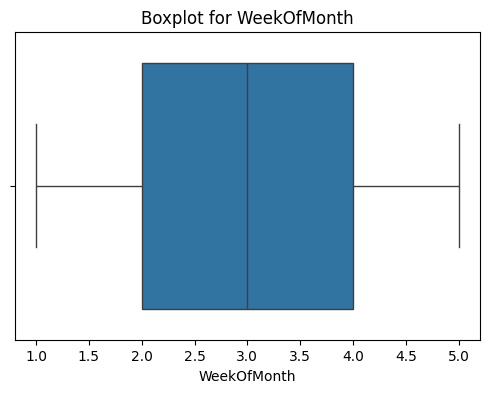

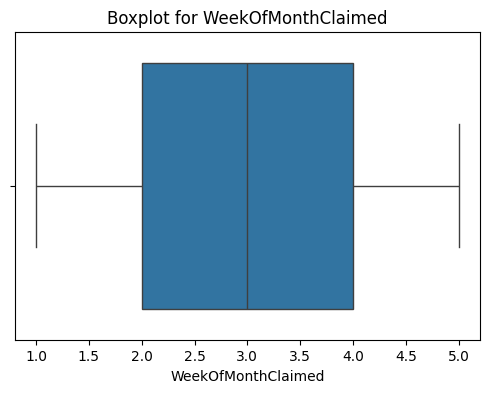

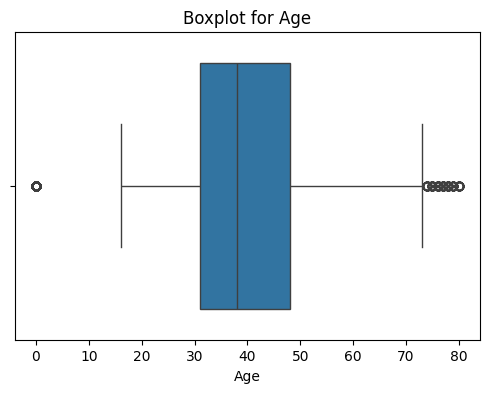

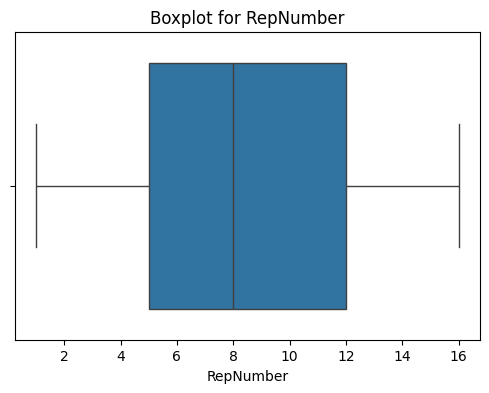

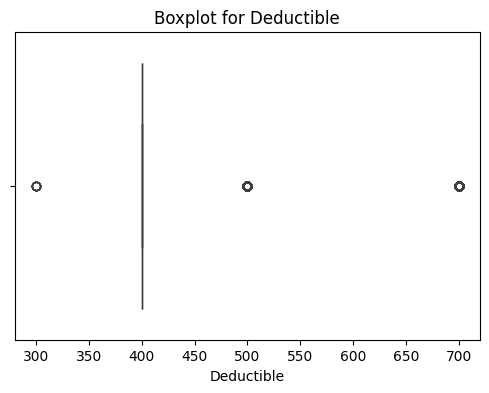

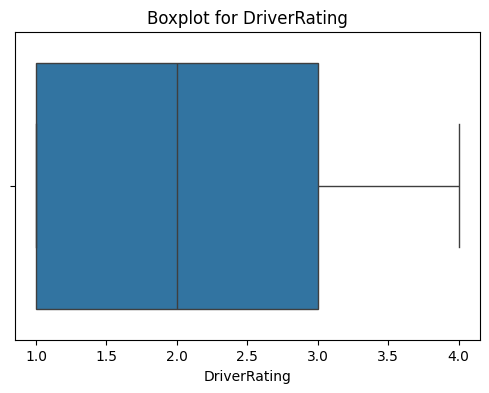

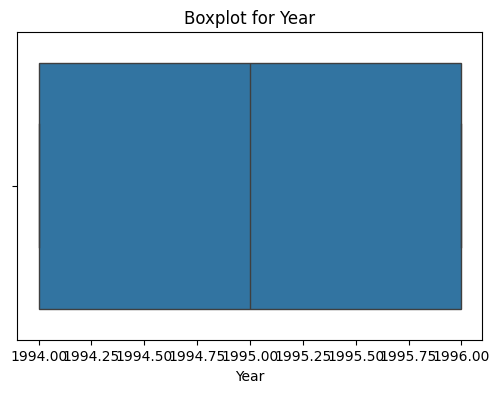

In [202]:
#box plot to find outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [203]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [204]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')


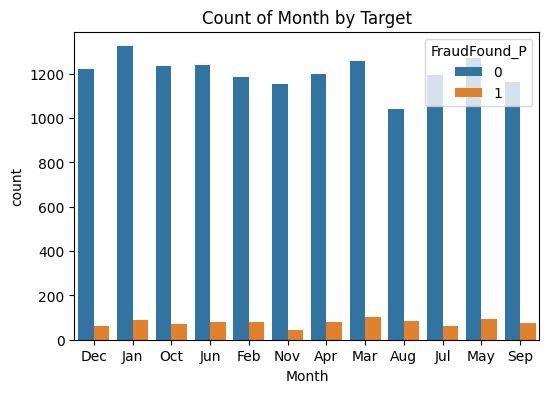

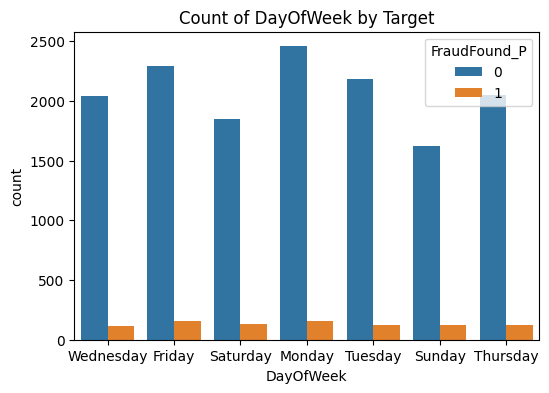

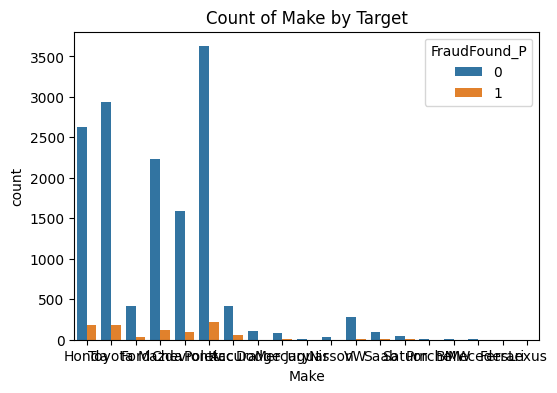

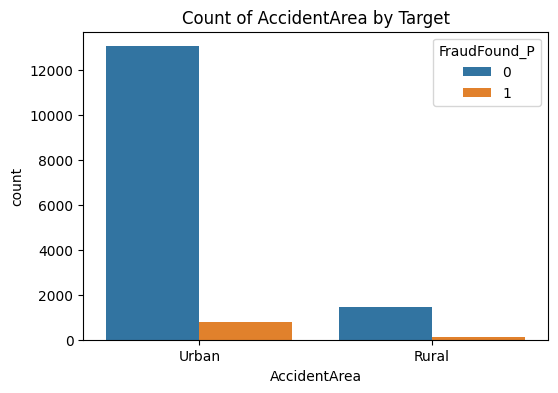

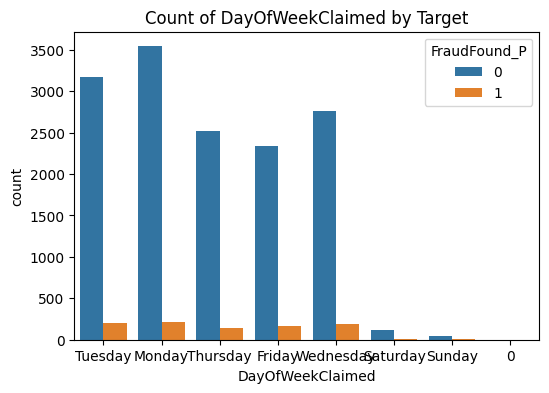

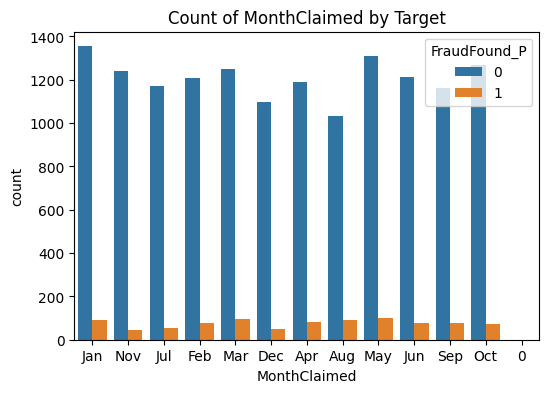

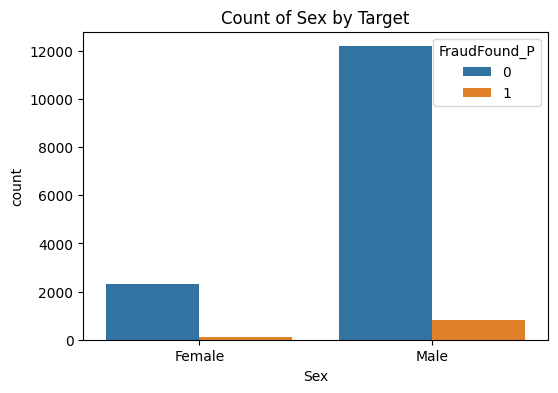

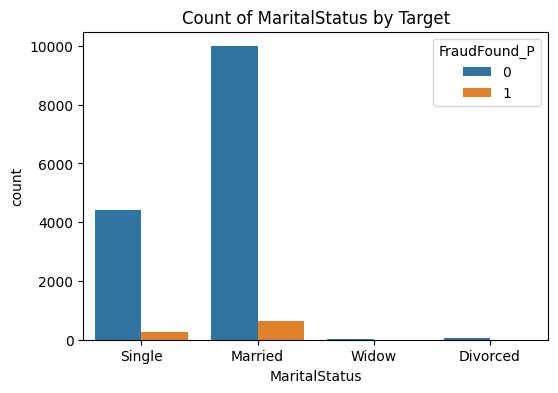

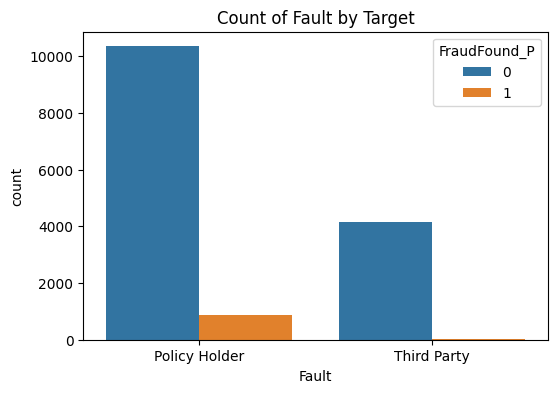

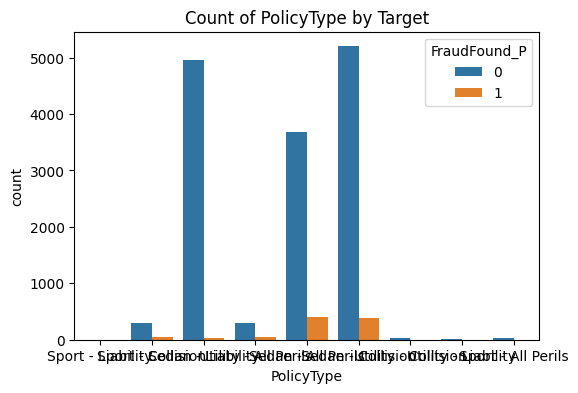

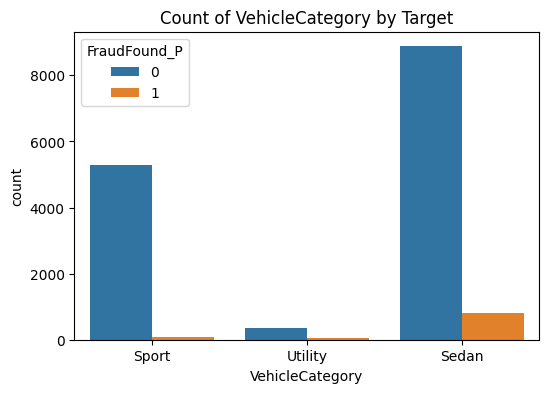

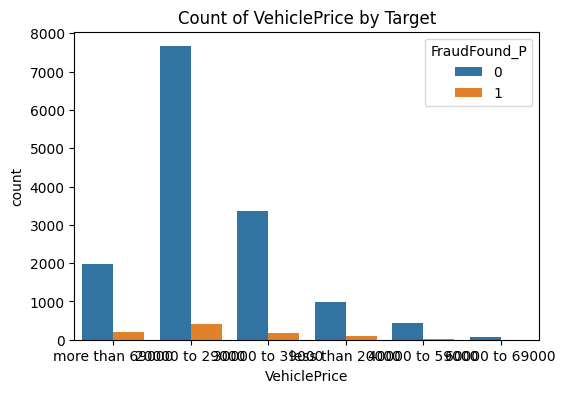

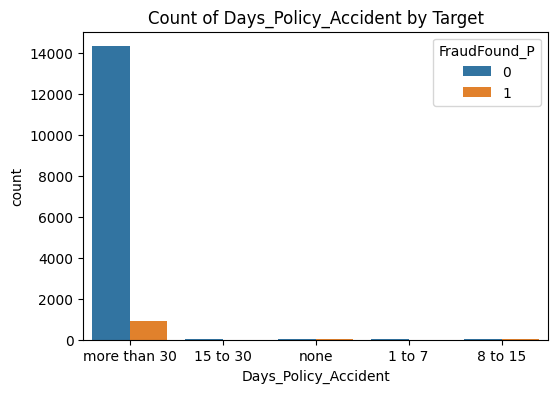

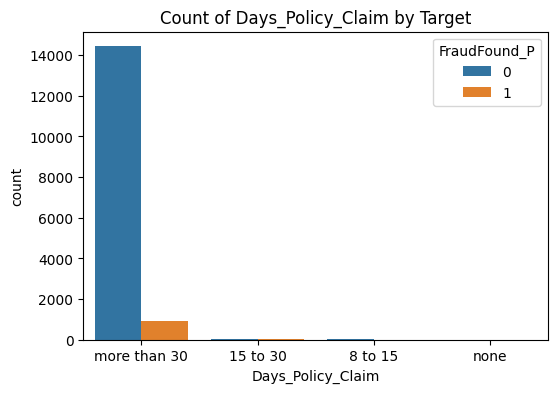

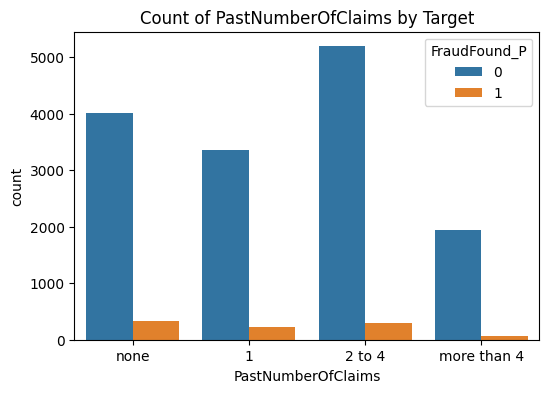

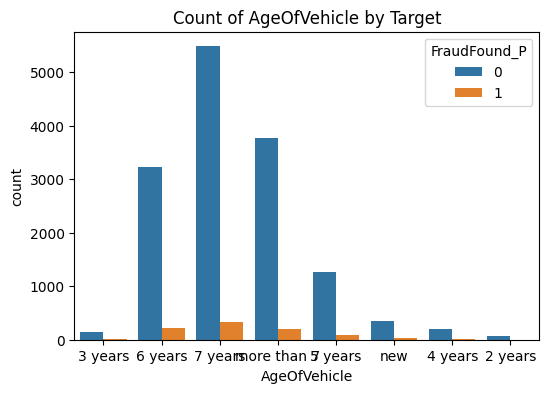

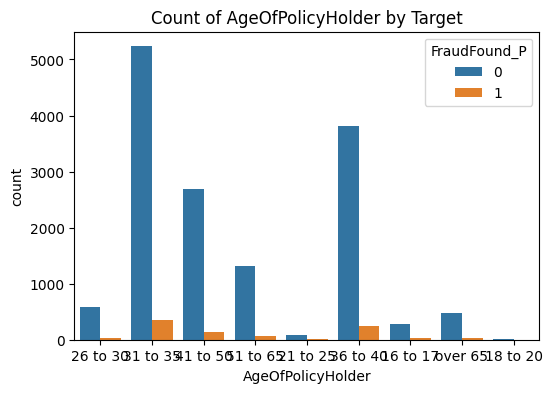

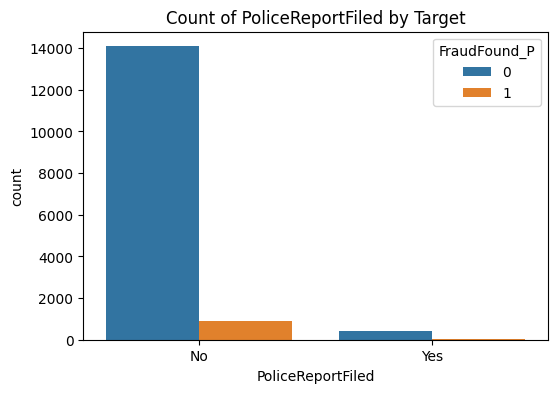

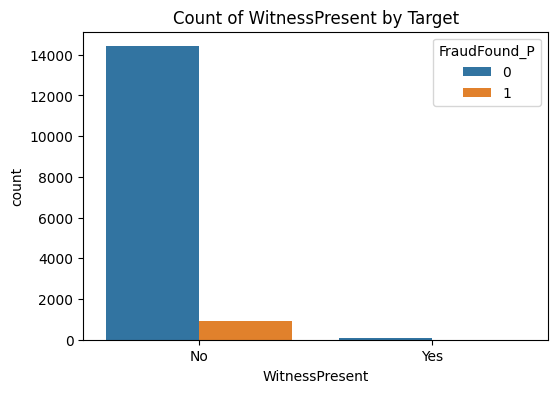

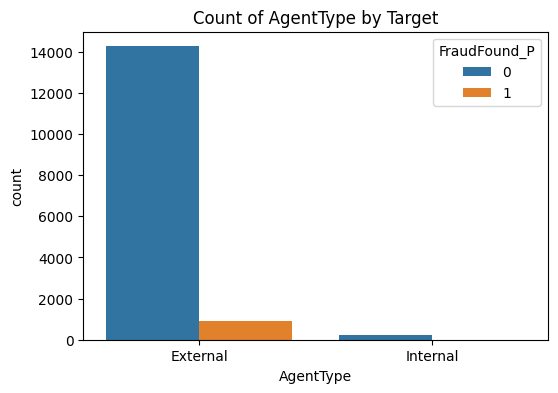

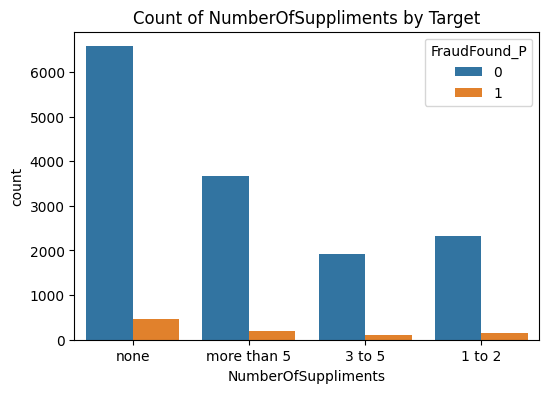

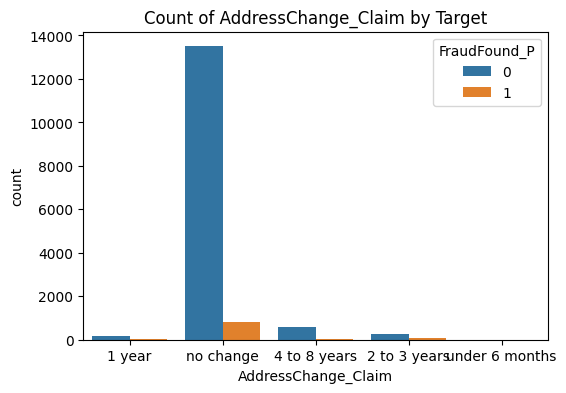

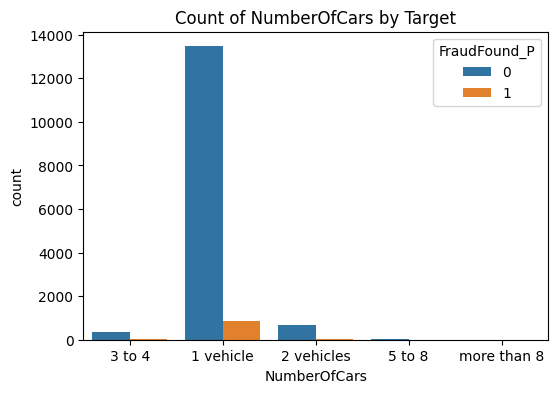

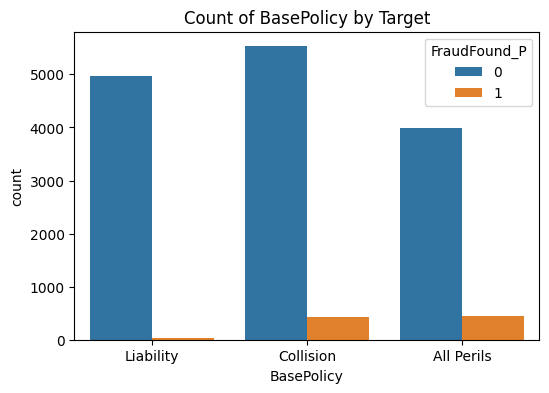

In [205]:
#show relationship between target and categorical column
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='FraudFound_P', data=data)
    plt.title(f"Count of {col} by Target")
    plt.show()

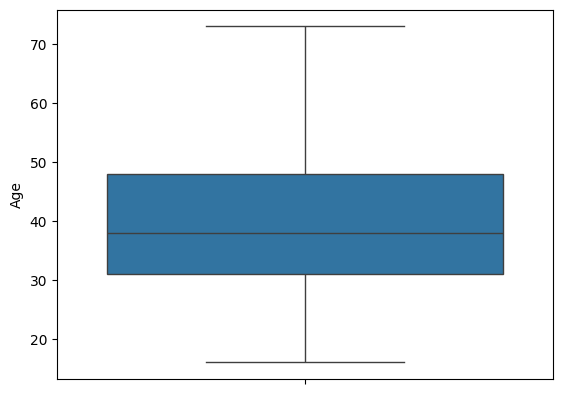

In [206]:
#clean outliers
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["Age"] >= lower_bound) & (data["Age"] <= upper_bound)]
sns.boxplot(data["Age"])
plt.show()

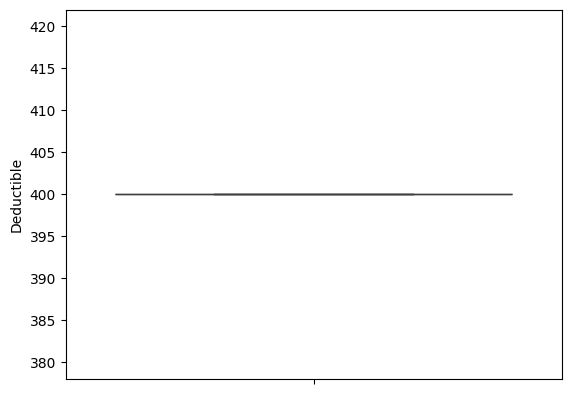

In [207]:
Q1 = data['Deductible'].quantile(0.25)
Q3 = data['Deductible'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["Deductible"] >= lower_bound) & (data["Deductible"] <= upper_bound)]
sns.boxplot(data["Deductible"])
plt.show()

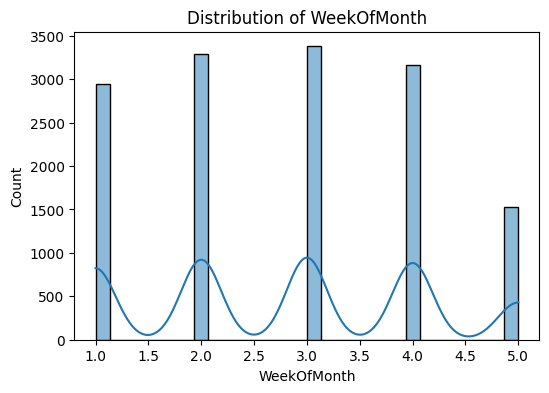

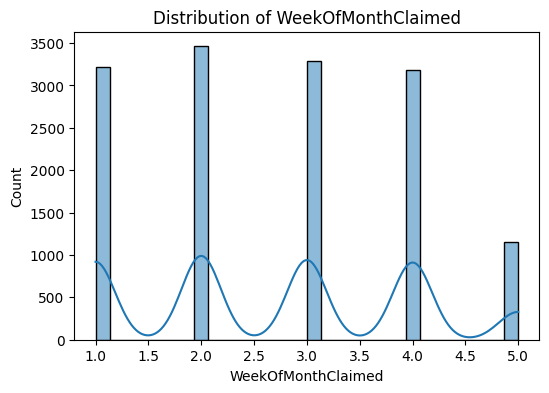

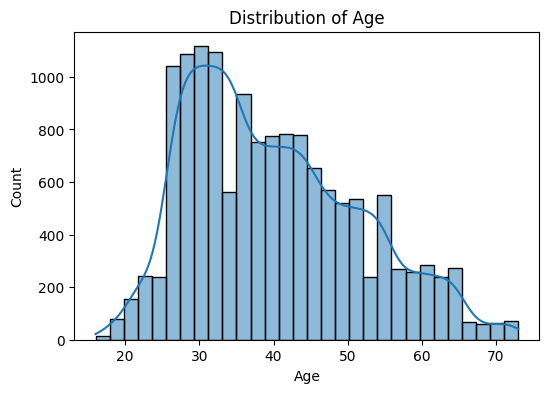

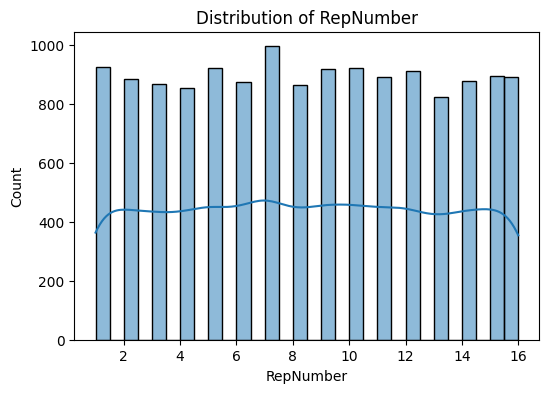

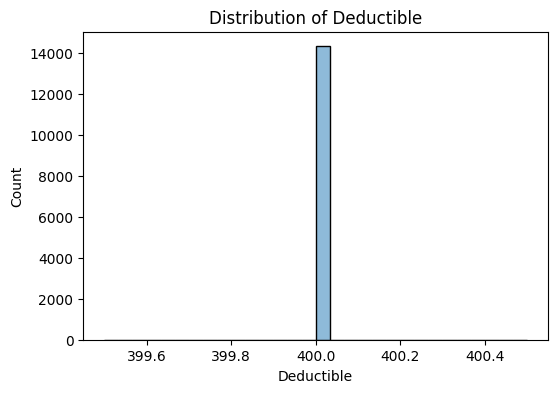

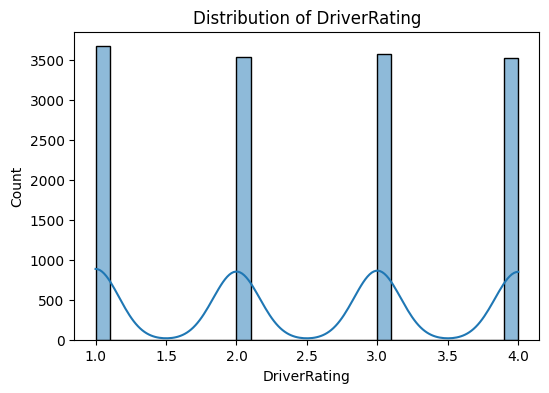

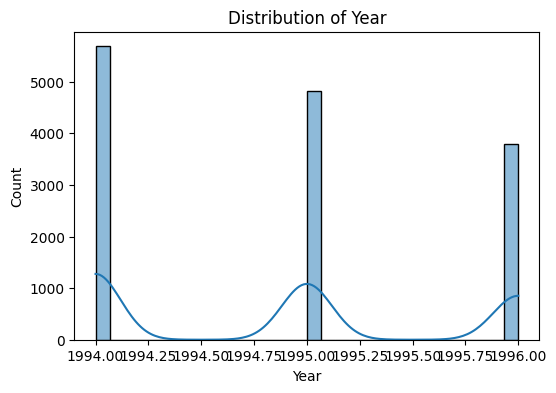

In [208]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

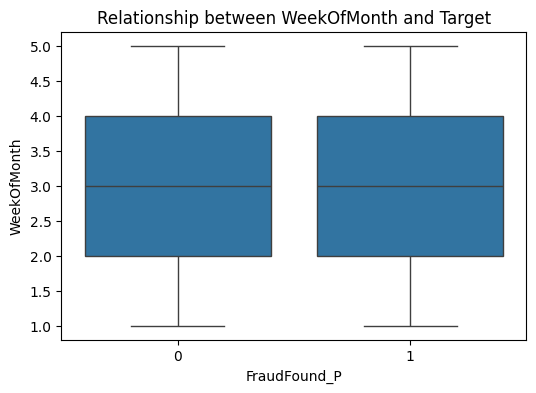

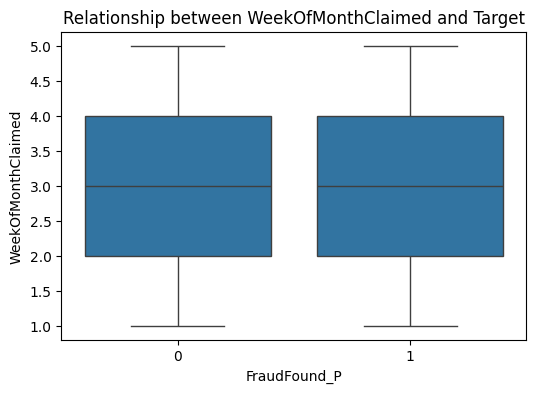

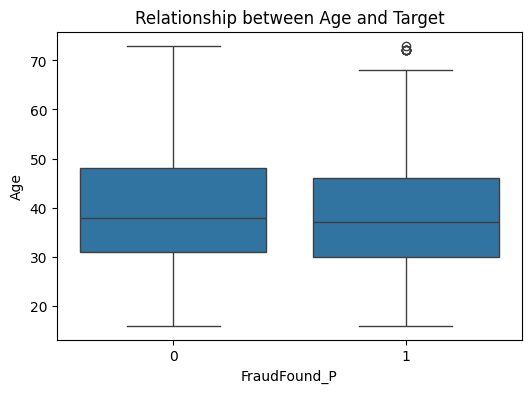

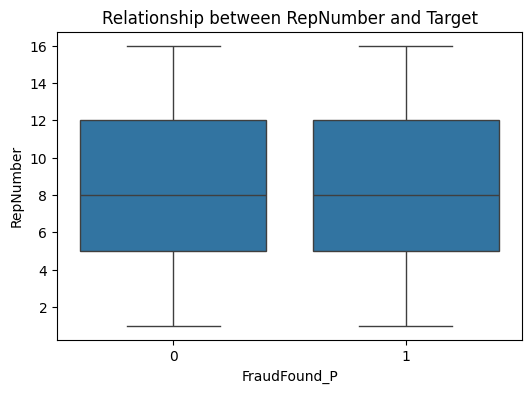

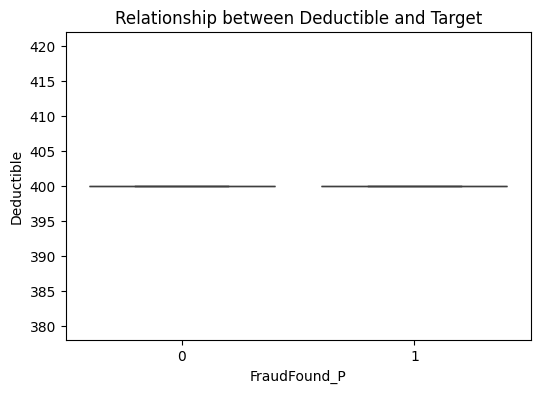

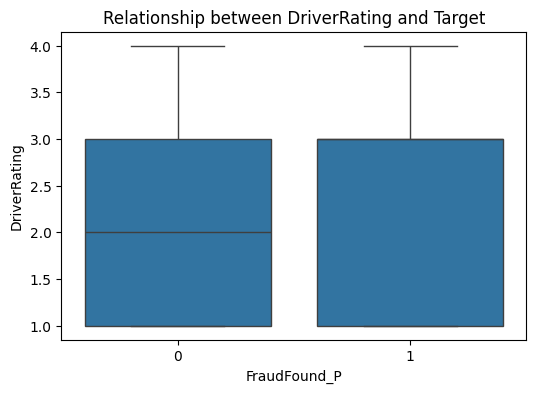

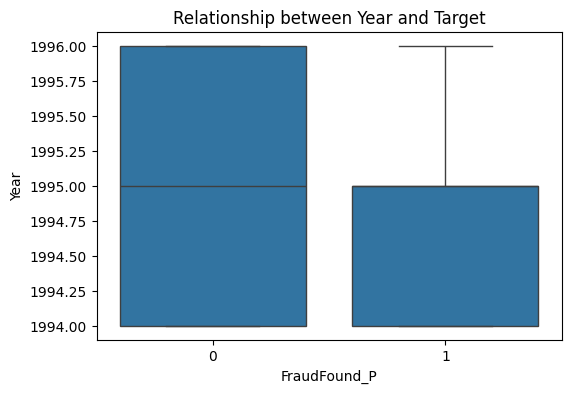

In [209]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data['FraudFound_P'], y=data[col])
    plt.title(f"Relationship between {col} and Target")
    plt.show()


In [210]:
from sklearn.model_selection import train_test_split
#split data
features = data.drop(columns=['FraudFound_P'])  
target = data['FraudFound_P']               

X_train, X_test, y_train, y_test = train_test_split(features, target , test_size=0.3, random_state=42, stratify=target)

In [211]:
data['Age'].unique()
# Dive in deeper into age to look at the unique categories , realised that there is age 0 - which is illogical 
#in this code we dont have age=0 beacuse we clen outliers before

array([34, 47, 65, 27, 20, 36, 30, 42, 71, 52, 28, 61, 38, 41, 32, 40, 63,
       31, 45, 60, 21, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48, 64,
       33, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 67, 19, 58,
       69, 73, 24, 62, 70, 17, 66], dtype=int64)

In [212]:
avr = round(X_train['Age'][X_train['Age'] != 0].mean(), 0)
X_train.loc[X_train['Age'] == 0, 'Age'] = avr
X_test.loc[X_test['Age'] == 0, 'Age'] = avr
# Replace all 0 values with the average age

In [213]:

invalid_day = X_train['DayOfWeekClaimed'] == '0'
invalid_month = X_train['MonthClaimed'] == '0'


In [214]:

invalid_rows = X_train[invalid_day & invalid_month].index

In [215]:
X_train.drop(invalid_rows, axis=0, inplace=True)
y_train = y_train.drop(invalid_rows).reset_index(drop=True)

In [216]:
most_common_day = X_train.loc[~invalid_day, 'DayOfWeekClaimed'].mode()[0]
most_common_month = X_train.loc[~invalid_month, 'MonthClaimed'].mode()[0]

In [217]:
X_test.loc[X_test['DayOfWeekClaimed'] == '0', 'DayOfWeekClaimed'] = most_common_day
X_test.loc[X_test['MonthClaimed'] == '0', 'MonthClaimed'] = most_common_month

In [218]:
X_train.reset_index(drop=True, inplace=True)

In [230]:
print(data['PastNumberOfClaims'].dtype)
print(data['PastNumberOfClaims'].unique())

object
['none' '1' '2 to 4' 'more than 4']


In [231]:
# Define a mapping for the values in 'PastNumberOfClaims'
mapping = {
    'none': 0,
    '1': 1,
    '2 to 4': 3,          # Average of the range
    'more than 4': 5      # Assign a value greater than 4
}

X_train['PastNumberOfClaims'] = X_train['PastNumberOfClaims'].map(mapping)

# Apply the same mapping to the test set
X_test['PastNumberOfClaims'] = X_test['PastNumberOfClaims'].map(mapping)

# Handle any potential unmapped values in the test set
if X_test['PastNumberOfClaims'].isnull().any():
    # Replace unmapped values with a default (e.g., 0) or handle differently
    X_test['PastNumberOfClaims'].fillna(0, inplace=True)

# Verify the transformation
print("Training set:", X_train['PastNumberOfClaims'].unique())
print("Test set:", X_test['PastNumberOfClaims'].unique())


Training set: [3 1 5 0]
Test set: [3 1 0 5]


In [232]:
print(data['AgeOfVehicle'].dtype)

# Check unique values in the column to understand its nature
print(data['AgeOfVehicle'].unique())


object
['6 years' '7 years' 'more than 7' '5 years' '4 years' '2 years' '3 years'
 'new']


In [233]:
# Define a mapping for the values in the car age column
car_age_mapping = {
    'new': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    'more than 7': 8
}

# Apply mapping only to the training set
X_train['AgeOfVehicle'] = X_train['AgeOfVehicle'].map(car_age_mapping)

# Apply the same mapping to the test set
X_test['AgeOfVehicle'] = X_test['AgeOfVehicle'].map(car_age_mapping)

# Handle any potential unmapped values in the test set
if X_test['AgeOfVehicle'].isnull().any():
    # Replace unmapped values with a default value (e.g., the most common value in X_train)
    default_value = X_train['AgeOfVehicle'].mode()[0]  # Use the mode of training data as default
    X_test['AgeOfVehicle'].fillna(default_value, inplace=True)

# Verify the transformation
print("Training set unique values:", X_train['AgeOfVehicle'].unique())
print("Test set unique values:", X_test['AgeOfVehicle'].unique())


Training set unique values: [5 7 8 6 3 2 4 1]
Test set unique values: [6 7 5 8 4 3 1 2]


In [234]:
print(data['NumberOfCars'].dtype)

# Check unique values in the column to understand its nature
print(data['NumberOfCars'].unique())

object
['1 vehicle' '2 vehicles' '3 to 4' '5 to 8' 'more than 8']


In [235]:
# Define a discrete mapping for the 'NumberOfCars' column
number_of_cars_discrete_mapping = {
    '1 vehicle': 1,
    '2 vehicles': 2,
    '3 to 4': 4,
    '5 to 8': 8,
    'more than 8': 9
}

# Apply mapping only to the training set
X_train['NumberOfCars'] = X_train['NumberOfCars'].map(number_of_cars_discrete_mapping)

# Apply the same mapping to the test set
X_test['NumberOfCars'] = X_test['NumberOfCars'].map(number_of_cars_discrete_mapping)

# Handle any potential unmapped values in the test set
if X_test['NumberOfCars'].isnull().any():
    # Replace unmapped values with a default value (e.g., the most common value in X_train)
    default_value = X_train['NumberOfCars'].mode()[0]  # Use the mode of training data as default
    X_test['NumberOfCars'].fillna(default_value, inplace=True)

# Verify the transformation
print("Training set unique values:", X_train['NumberOfCars'].unique())
print("Test set unique values:", X_test['NumberOfCars'].unique())


Training set unique values: [1 4 2 8 9]
Test set unique values: [1 4 2 8]


In [236]:
# Define mappings
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 
    'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 
    'Oct': 10, 'Nov': 11, 'Dec': 12
}

day_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}

# Apply cyclic encoding for 'MonthClaimed'
X_train['MonthClaimed'] = X_train['MonthClaimed'].map(month_mapping)
X_train['MonthClaimed_sin'] = np.sin(2 * np.pi * X_train['MonthClaimed'] / 12)
X_train['MonthClaimed_cos'] = np.cos(2 * np.pi * X_train['MonthClaimed'] / 12)
X_train.drop(columns=['MonthClaimed'], inplace=True)

X_test['MonthClaimed'] = X_test['MonthClaimed'].map(month_mapping)
X_test['MonthClaimed_sin'] = np.sin(2 * np.pi * X_test['MonthClaimed'] / 12)
X_test['MonthClaimed_cos'] = np.cos(2 * np.pi * X_test['MonthClaimed'] / 12)
X_test.drop(columns=['MonthClaimed'], inplace=True)

# Apply cyclic encoding for 'Month'
X_train['Month'] = X_train['Month'].map(month_mapping)
X_train['Month_sin'] = np.sin(2 * np.pi * X_train['Month'] / 12)
X_train['Month_cos'] = np.cos(2 * np.pi * X_train['Month'] / 12)
X_train.drop(columns=['Month'], inplace=True)

X_test['Month'] = X_test['Month'].map(month_mapping)
X_test['Month_sin'] = np.sin(2 * np.pi * X_test['Month'] / 12)
X_test['Month_cos'] = np.cos(2 * np.pi * X_test['Month'] / 12)
X_test.drop(columns=['Month'], inplace=True)

# Apply cyclic encoding for 'DayOfWeek'
X_train['DayOfWeek'] = X_train['DayOfWeek'].map(day_mapping)
X_train['DayOfWeek_sin'] = np.sin(2 * np.pi * X_train['DayOfWeek'] / 7)
X_train['DayOfWeek_cos'] = np.cos(2 * np.pi * X_train['DayOfWeek'] / 7)
X_train.drop(columns=['DayOfWeek'], inplace=True)

X_test['DayOfWeek'] = X_test['DayOfWeek'].map(day_mapping)
X_test['DayOfWeek_sin'] = np.sin(2 * np.pi * X_test['DayOfWeek'] / 7)
X_test['DayOfWeek_cos'] = np.cos(2 * np.pi * X_test['DayOfWeek'] / 7)
X_test.drop(columns=['DayOfWeek'], inplace=True)

# Apply cyclic encoding for 'DayOfWeekClaimed'
X_train['DayOfWeekClaimed'] = X_train['DayOfWeekClaimed'].map(day_mapping)
X_train['DayOfWeekClaimed_sin'] = np.sin(2 * np.pi * X_train['DayOfWeekClaimed'] / 7)
X_train['DayOfWeekClaimed_cos'] = np.cos(2 * np.pi * X_train['DayOfWeekClaimed'] / 7)
X_train.drop(columns=['DayOfWeekClaimed'], inplace=True)

X_test['DayOfWeekClaimed'] = X_test['DayOfWeekClaimed'].map(day_mapping)
X_test['DayOfWeekClaimed_sin'] = np.sin(2 * np.pi * X_test['DayOfWeekClaimed'] / 7)
X_test['DayOfWeekClaimed_cos'] = np.cos(2 * np.pi * X_test['DayOfWeekClaimed'] / 7)
X_test.drop(columns=['DayOfWeekClaimed'], inplace=True)

# Apply one-hot encoding for categorical features
X_train = pd.get_dummies(X_train, columns=['PolicyType', 'AccidentArea', 'Fault', 'BasePolicy'], drop_first=False)
X_test = pd.get_dummies(X_test, columns=['PolicyType', 'AccidentArea', 'Fault', 'BasePolicy'], drop_first=False)

# Apply mapping for binary features
binary_mappings = {
    'Sex': {'Male': 0, 'Female': 1},
    'WitnessPresent': {'Yes': 1, 'No': 0},
    'AgentType': {'External': 0, 'Internal': 1},
    'PoliceReportFiled': {'Yes': 1, 'No': 0}
}

for column, mapping in binary_mappings.items():
    X_train[column] = X_train[column].map(mapping)
    X_test[column] = X_test[column].map(mapping)

# Handle missing columns in test set after one-hot encoding
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]  # Reorder test set columns to match training set


In [237]:
# Define mappings
policy_mapping = {'none': 0, '8 to 15': 1, '15 to 30': 2, 'more than 30': 3}
price_mapping = {
    'less than 20000': 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000': 4,
    'more than 69000': 5
}
Days_Policy_Accident_mapping = {
    'none': 0,
    '1 to 7': 1,
    '8 to 15': 2,
    '15 to 30': 3,
    'more than 30': 4
}
number_of_suppliments_mapping = {
    'none': 0, 
    '1 to 2': 1, 
    '3 to 5': 2, 
    'more than 5': 3
}
age_of_policy_holder_mapping = {
    '16 to 17': 0, 
    '18 to 20': 1, 
    '21 to 25': 2, 
    '26 to 30': 3, 
    '31 to 35': 4, 
    '36 to 40': 5, 
    '41 to 50': 6, 
    '51 to 65': 7, 
    'over 65': 8
}

# Apply mappings to training set
X_train['Days_Policy_Claim'] = X_train['Days_Policy_Claim'].map(policy_mapping)
X_train['VehiclePrice'] = X_train['VehiclePrice'].map(price_mapping)
X_train['Days_Policy_Accident'] = X_train['Days_Policy_Accident'].map(Days_Policy_Accident_mapping)
X_train['NumberOfSuppliments'] = X_train['NumberOfSuppliments'].map(number_of_suppliments_mapping)
X_train['AgeOfPolicyHolder'] = X_train['AgeOfPolicyHolder'].map(age_of_policy_holder_mapping)

# Apply the same mappings to the test set
X_test['Days_Policy_Claim'] = X_test['Days_Policy_Claim'].map(policy_mapping)
X_test['VehiclePrice'] = X_test['VehiclePrice'].map(price_mapping)
X_test['Days_Policy_Accident'] = X_test['Days_Policy_Accident'].map(Days_Policy_Accident_mapping)
X_test['NumberOfSuppliments'] = X_test['NumberOfSuppliments'].map(number_of_suppliments_mapping)
X_test['AgeOfPolicyHolder'] = X_test['AgeOfPolicyHolder'].map(age_of_policy_holder_mapping)

# Handle missing values (if any) in the test set after mapping
default_values = {
    'Days_Policy_Claim': X_train['Days_Policy_Claim'].mode()[0],
    'VehiclePrice': X_train['VehiclePrice'].mode()[0],
    'Days_Policy_Accident': X_train['Days_Policy_Accident'].mode()[0],
    'NumberOfSuppliments': X_train['NumberOfSuppliments'].mode()[0],
    'AgeOfPolicyHolder': X_train['AgeOfPolicyHolder'].mode()[0]
}

for column, default_value in default_values.items():
    X_test[column].fillna(default_value, inplace=True)

# Verify the transformation
print("Training set unique values:")
print(X_train.nunique())
print("\nTest set unique values:")
print(X_test.nunique())






Training set unique values:
WeekOfMonth                         5
Make                               18
WeekOfMonthClaimed                  5
Sex                                 2
MaritalStatus                       4
Age                                58
VehicleCategory                     3
VehiclePrice                        6
RepNumber                          16
Deductible                          1
DriverRating                        4
Days_Policy_Accident                5
Days_Policy_Claim                   3
PastNumberOfClaims                  4
AgeOfVehicle                        8
AgeOfPolicyHolder                   8
PoliceReportFiled                   2
WitnessPresent                      2
AgentType                           2
NumberOfSuppliments                 4
AddressChange_Claim                 5
NumberOfCars                        5
Year                                3
MonthClaimed_sin                   11
MonthClaimed_cos                   11
Month_sin             

In [238]:
import category_encoders as ce

columns_to_encode = ['VehicleCategory', 'Make', 'MaritalStatus']

for column in columns_to_encode:
    encoder = ce.BinaryEncoder(cols=[column])
    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)




In [239]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['AddressChange_Claim']

for column in columns_to_encode:
    encoder = LabelEncoder()
    X_train[column] = encoder.fit_transform(X_train[column])
    X_test[column] = encoder.transform(X_test[column])


In [240]:
print(data.isna().sum())

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [241]:
#print(data['MonthClaimed_sin'].dtype)

# Check unique values in the column to understand its nature
#print(data['MonthClaimed_sin'].unique())

In [242]:
print(data.isna().sum())

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [243]:
#corr_matrix = data.corr()

# Increase the figure size
#plt.figure(figsize=(20, 10))

#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix')
#plt.show()

In [244]:
data.describe()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14304 entries, 1 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 14304 non-null  object
 1   WeekOfMonth           14304 non-null  int64 
 2   DayOfWeek             14304 non-null  object
 3   Make                  14304 non-null  object
 4   AccidentArea          14304 non-null  object
 5   DayOfWeekClaimed      14304 non-null  object
 6   MonthClaimed          14304 non-null  object
 7   WeekOfMonthClaimed    14304 non-null  int64 
 8   Sex                   14304 non-null  object
 9   MaritalStatus         14304 non-null  object
 10  Age                   14304 non-null  int64 
 11  Fault                 14304 non-null  object
 12  PolicyType            14304 non-null  object
 13  VehicleCategory       14304 non-null  object
 14  VehiclePrice          14304 non-null  object
 15  FraudFound_P          14304 non-null  int

In [245]:
# Presenting the correlation as a hetmap for better visualisation
#plt.figure(figsize=(10, 8))
#correlation_matrix = numeric_data.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
#plt.title("Correlation Matrix")
#plt.show()



In [246]:
#clean outliers
"""Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["Age"] >= lower_bound) & (data["Age"] <= upper_bound)]
sns.boxplot(data["Age"])
plt.show()"""

'Q1 = data[\'Age\'].quantile(0.25)\nQ3 = data[\'Age\'].quantile(0.75)\nIQR = Q3 - Q1\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\ndata = data[(data["Age"] >= lower_bound) & (data["Age"] <= upper_bound)]\nsns.boxplot(data["Age"])\nplt.show()'

In [247]:
"""Q1 = data['Deductible'].quantile(0.25)
Q3 = data['Deductible'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["Deductible"] >= lower_bound) & (data["Deductible"] <= upper_bound)]
sns.boxplot(data["Deductible"])
plt.show()"""

'Q1 = data[\'Deductible\'].quantile(0.25)\nQ3 = data[\'Deductible\'].quantile(0.75)\nIQR = Q3 - Q1\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\ndata = data[(data["Deductible"] >= lower_bound) & (data["Deductible"] <= upper_bound)]\nsns.boxplot(data["Deductible"])\nplt.show()'

In [248]:
"""for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()"""

'for col in numerical_cols:\n    plt.figure(figsize=(6, 4))\n    sns.histplot(data[col], kde=True, bins=30)\n    plt.title(f"Distribution of {col}")\n    plt.show()'

In [249]:

"""for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data['FraudFound_P'], y=data[col])
    plt.title(f"Relationship between {col} and Target")
    plt.show()"""


'for col in numerical_cols:\n    plt.figure(figsize=(6, 4))\n    sns.boxplot(x=data[\'FraudFound_P\'], y=data[col])\n    plt.title(f"Relationship between {col} and Target")\n    plt.show()'

In [250]:
#part3 Classification




In [251]:
numerical_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 
                        'RepNumber', 'Deductible', 'DriverRating','Year']
#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
data.head(10)

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
1    Jan            3  Wednesday   Honda        Urban           Monday   
2    Oct            5     Friday   Honda        Urban         Thursday   
3    Jun            2   Saturday  Toyota        Rural           Friday   
4    Jan            5     Monday   Honda        Urban          Tuesday   
5    Oct            4     Friday   Honda        Urban        Wednesday   
6    Feb            1   Saturday   Honda        Urban           Monday   
8    Dec            4   Saturday   Honda        Urban        Wednesday   
9    Apr            3    Tuesday    Ford        Urban        Wednesday   
10   Mar            2     Sunday   Mazda        Urban        Wednesday   
11   Mar            5     Monday   Honda        Urban           Monday   

   MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
1           Jan                   4    Male        Single  ...       6 years   
2           Nov                   2    Male       Married  ...       7 years   
3           Jul                   1    Male       Married  ...   more than 7   
4           Feb                   2  Female        Single  ...       5 years   
5           Nov                   1    Male        Single  ...       5 years   
6           Feb                   3    Male       Married  ...       7 years   
8           Dec                   5    Male        Single  ...       6 years   
9           Apr                   3    Male       Married  ...   more than 7   
10          Mar                   3    Male        Single  ...   more than 7   
11          Mar                   5    Male       Married  ...   more than 7   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1           31 to 35               Yes             No  External   
2           41 to 50                No             No  External   
3           51 to 65               Yes             No  External   
4           31 to 35                No             No  External   
5           21 to 25                No             No  External   
6           36 to 40                No             No  External   
8           31 to 35                No            Yes  External   
9           36 to 40                No             No  External   
10           over 65                No             No  External   
11          41 to 50                No             No  External   

    NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
1                  none            no change     1 vehicle  1994   Collision  
2                  none            no change     1 vehicle  1994   Collision  
3           more than 5            no change     1 vehicle  1994   Liability  
4                  none            no change     1 vehicle  1994   Collision  
5                3 to 5            no change     1 vehicle  1994   Collision  
6                1 to 2            no change     1 vehicle  1994   Collision  
8                3 to 5            no change     1 vehicle  1994   Collision  
9                3 to 5            no change     1 vehicle  1994  All Perils  
10                 none            no change     1 vehicle  1994  All Perils  
11                 none            no change     1 vehicle  1994   Liability  

[10 rows x 32 columns]

In [252]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 31/31 [00:17<00:00,  1.73it/s]

[LightGBM] [Info] Number of positive: 571, number of negative: 9441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Number of data points in the train set: 10012, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057032 -> initscore=-2.805428
[LightGBM] [Info] Start training from score -2.805428
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.49               0.60     0.60      0.61   
DecisionTreeClassifier             0.89               0.55     0.55      0.90   
PassiveAggressiveClassifier        0.86               0.54     0.54      0.88   
QuadraticDiscriminantAnalysis      0.78  

In [253]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)

#smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [254]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)
models.head(10)
print(models)

100%|██████████| 31/31 [00:38<00:00,  1.25s/it]

[LightGBM] [Info] Number of positive: 4720, number of negative: 9441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3664
[LightGBM] [Info] Number of data points in the train set: 14161, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333310 -> initscore=-0.693253
[LightGBM] [Info] Start training from score -0.693253
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.54               0.60     0.60      0.66   
BernoulliNB                        0.77               0.57     0.57      0.83   
KNeighborsClassifier               0.83               0.57     0.57      0.86   
NearestCentroid                    0.63               0.56     0.56      0.73   
Perceptron            

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(random_state=42, class_weight='balanced')


model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Confusion Matrix:
[[4038    9]
 [ 242    3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4047
           1       0.25      0.01      0.02       245

    accuracy                           0.94      4292
   macro avg       0.60      0.51      0.50      4292
weighted avg       0.90      0.94      0.92      4292


ROC AUC Score:
0.8069419020387993


In [256]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_prob = model.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.05)  
results = []

for threshold in thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results.append((threshold, precision, recall, f1, accuracy))


print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.13      | 0.84   | 0.22   | 0.66
0.15      | 0.15      | 0.67   | 0.25   | 0.77
0.20      | 0.16      | 0.42   | 0.23   | 0.84
0.25      | 0.16      | 0.22   | 0.19   | 0.89
0.30      | 0.18      | 0.14   | 0.16   | 0.92
0.35      | 0.18      | 0.07   | 0.10   | 0.93
0.40      | 0.20      | 0.03   | 0.06   | 0.94
0.45      | 0.20      | 0.02   | 0.03   | 0.94
0.50      | 0.25      | 0.01   | 0.02   | 0.94
0.55      | 0.00      | 0.00   | 0.00   | 0.94
0.60      | 0.00      | 0.00   | 0.00   | 0.94
0.65      | 0.00      | 0.00   | 0.00   | 0.94
0.70      | 0.00      | 0.00   | 0.00   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94


In [257]:
optimal_threshold = 0.18
y_pred_rf = (y_prob >= optimal_threshold).astype(int)

print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_rf))



Confusion Matrix with Optimal Threshold:
[[3311  736]
 [ 106  139]]

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      4047
           1       0.16      0.57      0.25       245

    accuracy                           0.80      4292
   macro avg       0.56      0.69      0.57      4292
weighted avg       0.92      0.80      0.85      4292



In [258]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Optimal Threshold Metrics:\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1:.2f}\nAccuracy: {accuracy:.2f}")


Optimal Threshold Metrics:
Precision: 0.16
Recall: 0.57
F1-Score: 0.25
Accuracy: 0.80


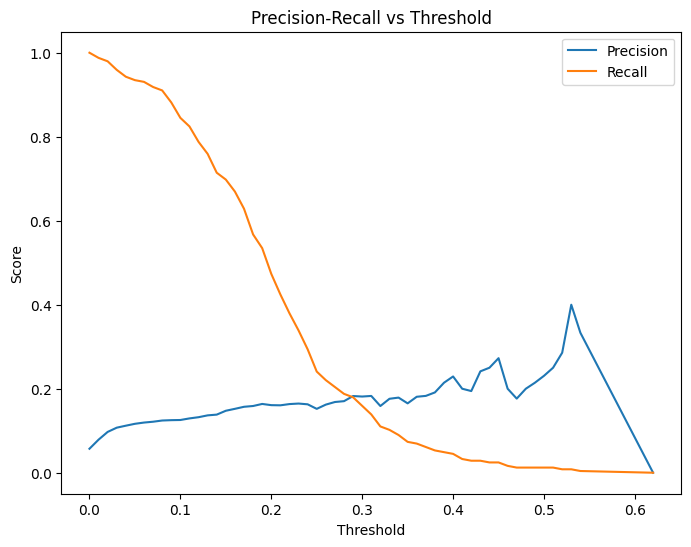

In [259]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()


Optimal Threshold: 0.62
Highest F1-Score: nan


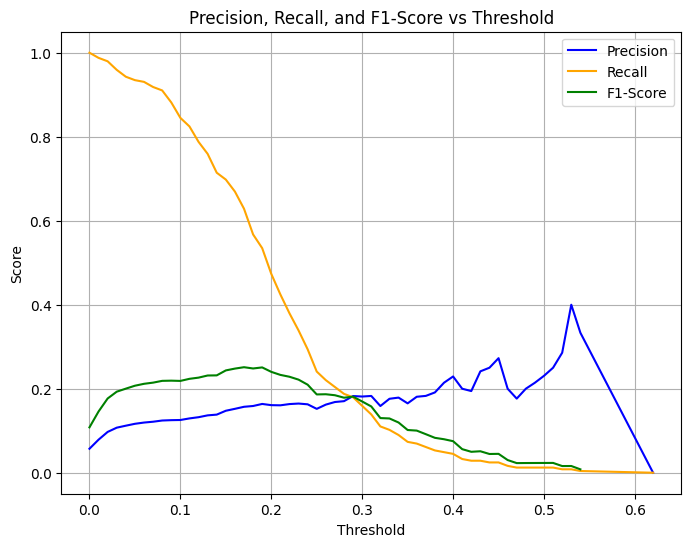

In [260]:
from sklearn.metrics import precision_recall_curve, f1_score


y_probs = model.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_probs)


f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = f1_scores[:-1]  


optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Highest F1-Score: {f1_scores[optimal_idx]}")


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color='blue')
plt.plot(thresholds, recall[:-1], label="Recall", color='orange')
plt.plot(thresholds, f1_scores, label="F1-Score", color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [262]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 501, 50),
    'max_depth': [None] + list(np.arange(2, 21, 2)),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'max_features': ['sqrt', 'log2', None]
}


rf = RandomForestClassifier(random_state=42, class_weight='balanced')

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='f1',  
    cv=5,  
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_resampled, y_train_resampled)


print("Best Parameters:", random_search.best_params_)
print("Best f1 score Score:", random_search.best_score_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best f1 score Score: 0.9258868679879921


In [263]:

best_rf_params = random_search.best_params_
optimized_rf = RandomForestClassifier(random_state=42, class_weight='balanced', **best_rf_params)


optimized_rf.fit(X_train_resampled, y_train_resampled)


y_pred_rf = optimized_rf.predict(X_test)
y_prob_rf = optimized_rf.predict_proba(X_test)[:, 1]


from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob_rf))


Confusion Matrix:
[[4031   16]
 [ 237    8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4047
           1       0.33      0.03      0.06       245

    accuracy                           0.94      4292
   macro avg       0.64      0.51      0.51      4292
weighted avg       0.91      0.94      0.92      4292


ROC AUC Score:
0.8128459982955377


In [264]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
thresholds = np.arange(0.1, 0.9, 0.05)
results = []

for threshold in thresholds:
    y_pred_thresh = (y_prob_rf >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results.append((threshold, precision, recall, f1, accuracy))

print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.13      | 0.88   | 0.22   | 0.65
0.15      | 0.14      | 0.76   | 0.24   | 0.72
0.20      | 0.15      | 0.56   | 0.24   | 0.79
0.25      | 0.18      | 0.42   | 0.25   | 0.86
0.30      | 0.19      | 0.27   | 0.23   | 0.89
0.35      | 0.21      | 0.16   | 0.18   | 0.92
0.40      | 0.19      | 0.07   | 0.10   | 0.93
0.45      | 0.20      | 0.04   | 0.06   | 0.94
0.50      | 0.33      | 0.03   | 0.06   | 0.94
0.55      | 0.23      | 0.01   | 0.02   | 0.94
0.60      | 0.14      | 0.00   | 0.01   | 0.94
0.65      | 0.00      | 0.00   | 0.00   | 0.94
0.70      | 0.00      | 0.00   | 0.00   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94


In [269]:
optimal_threshold = 0.25
y_pred_rf = (y_prob_rf >= optimal_threshold).astype(int)

print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_rf))



Confusion Matrix with Optimal Threshold:
[[3574  473]
 [ 142  103]]

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4047
           1       0.18      0.42      0.25       245

    accuracy                           0.86      4292
   macro avg       0.57      0.65      0.59      4292
weighted avg       0.92      0.86      0.88      4292



In [270]:
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Optimal Threshold Metrics:\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1:.2f}\nAccuracy: {accuracy:.2f}")


Optimal Threshold Metrics:
Precision: 0.18
Recall: 0.42
F1-Score: 0.25
Accuracy: 0.86


In [267]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)


xgb_model.fit(X_train_resampled, y_train_resampled)


y_pred_xgb = xgb_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix)


print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:")
print(roc_auc)


Confusion Matrix:
[[3788  259]
 [ 179   66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4047
           1       0.20      0.27      0.23       245

    accuracy                           0.90      4292
   macro avg       0.58      0.60      0.59      4292
weighted avg       0.91      0.90      0.90      4292


ROC AUC Score:
0.8371966132635412


In [268]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 5, 10]  
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False),
    param_grid=param_grid,
    scoring='f1',
    cv=3
)

grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_
best_xgb_params = grid_search.best_params_


In [271]:
from sklearn.metrics import precision_recall_curve

y_pred_xgb = best_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_xgb)

optimal_threshold = thresholds[(precisions + recalls).argmax()]
y_pred_custom = (y_pred_xgb >= optimal_threshold).astype(int)


In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


y_pred_xgb = (best_model.predict_proba(X_test)[:, 1] >= optimal_threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, pos_label=1)
recall = recall_score(y_test, y_pred_xgb, pos_label=1)
f1 = f1_score(y_test, y_pred_xgb, pos_label=1)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")



Confusion Matrix:
[[1750 2297]
 [   1  244]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60      4047
           1       0.10      1.00      0.18       245

    accuracy                           0.46      4292
   macro avg       0.55      0.71      0.39      4292
weighted avg       0.95      0.46      0.58      4292


Metrics:
Accuracy: 0.46
Precision: 0.10
Recall: 1.00
F1-Score: 0.18
ROC AUC Score: 0.83


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.13      | 0.84   | 0.22   | 0.66
0.15      | 0.15      | 0.67   | 0.25   | 0.77
0.20      | 0.16      | 0.42   | 0.23   | 0.84
0.25      | 0.16      | 0.22   | 0.19   | 0.89
0.30      | 0.18      | 0.14   | 0.16   | 0.92
0.35      | 0.18      | 0.07   | 0.10   | 0.93
0.40      | 0.20      | 0.03   | 0.06   | 0.94
0.45      | 0.20      | 0.02   | 0.03   | 0.94
0.50      | 0.25      | 0.01   | 0.02   | 0.94
0.55      | 0.00      | 0.00   | 0.00   | 0.94
0.60      | 0.00      | 0.00   | 0.00   | 0.94
0.65      | 0.00      | 0.00   | 0.00   | 0.94
0.70      | 0.00      | 0.00   | 0.00   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94


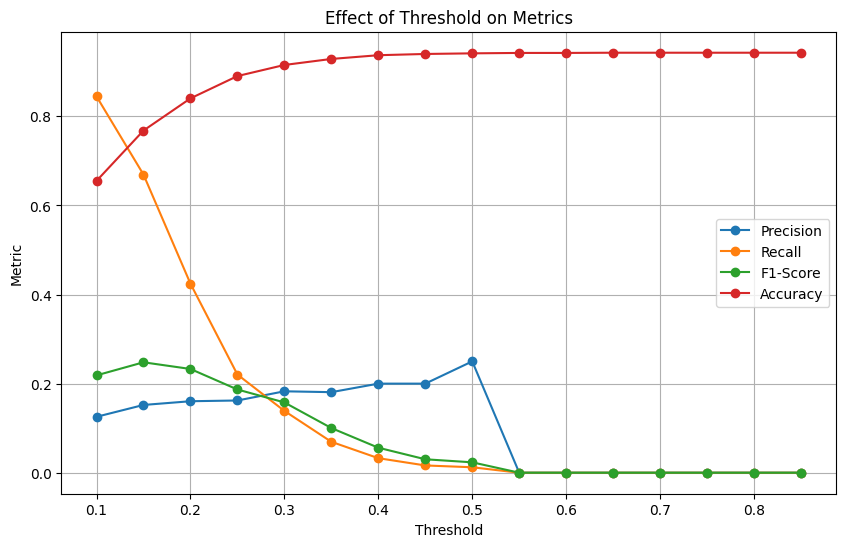

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, confusion_matrix

y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.05)


results = []

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    results.append((threshold, precision, recall, f1, accuracy))


results = np.array(results)


print("Threshold | Precision | Recall | F1-Score | Accuracy")
for row in results:
    print(f"{row[0]:.2f}      | {row[1]:.2f}      | {row[2]:.2f}   | {row[3]:.2f}   | {row[4]:.2f}")

 
plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], label="Precision", marker='o')
plt.plot(results[:, 0], results[:, 2], label="Recall", marker='o')
plt.plot(results[:, 0], results[:, 3], label="F1-Score", marker='o')
plt.plot(results[:, 0], results[:, 4], label="Accuracy", marker='o')
plt.xlabel("Threshold")
plt.ylabel("Metric")
plt.title("Effect of Threshold on Metrics")
plt.legend()
plt.grid()
plt.show()


In [274]:

optimal_threshold = 0.15
y_pred_xgb = (y_prob_xgb >= optimal_threshold).astype(int)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob_xgb))


Confusion Matrix:
[[3326  721]
 [  81  164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      4047
           1       0.19      0.67      0.29       245

    accuracy                           0.81      4292
   macro avg       0.58      0.75      0.59      4292
weighted avg       0.93      0.81      0.86      4292


ROC AUC Score:
0.8371966132635412


In [275]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score


scorers = {
    'F1-Score': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score),
    'ROC AUC': make_scorer(roc_auc_score, needs_proba=True)
}


for metric_name, scorer in scorers.items():
    scores = cross_val_score(
        model, X_train, y_train, scoring=scorer, cv=5  # 5-fold Cross-Validation
    )
    print(f"{metric_name} scores: {scores}")
    print(f"Mean {metric_name}: {scores.mean():.4f}")
    print(f"Standard Deviation {metric_name}: {scores.std():.4f}\n")



F1-Score scores: [0. 0. 0. 0. 0.]
Mean F1-Score: 0.0000
Standard Deviation F1-Score: 0.0000

Accuracy scores: [0.94308537 0.94258612 0.94305694 0.94305694 0.94305694]
Mean Accuracy: 0.9430
Standard Deviation Accuracy: 0.0002

ROC AUC scores: [0.82419687 0.80491433 0.81372658 0.81420978 0.80743802]
Mean ROC AUC: 0.8129
Standard Deviation ROC AUC: 0.0067



In [276]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
  
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 70),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    model = LGBMClassifier(random_state=42, **param)
    score = cross_val_score(model, X_train_resampled, y_train_resampled, scoring='f1', cv=5).mean()
    return score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


print("Best Parameters:", study.best_params)
print("Best f1 score:", study.best_value)


[I 2024-12-22 00:48:11,735] A new study created in memory with name: no-name-f140681b-8c73-4bc9-9e58-b79c0efb199e


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:13,685] Trial 0 finished with value: 0.9100098872545214 and parameters: {'num_leaves': 63, 'learning_rate': 0.035166292532464935, 'n_estimators': 347, 'max_depth': 6, 'subsample': 0.9857377362151235, 'colsample_bytree': 0.94342022809816, 'reg_alpha': 0.7367362032542905, 'reg_lambda': 0.831891576909193}. Best is trial 0 with value: 0.9100098872545214.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:15,973] Trial 1 finished with value: 0.9069784122707875 and parameters: {'num_leaves': 57, 'learning_rate': 0.09725967609986627, 'n_estimators': 261, 'max_depth': 7, 'subsample': 0.9594215370492476, 'colsample_bytree': 0.8616440263279818, 'reg_alpha': 0.32465027138257607, 'reg_lambda': 0.9199734134945087}. Best is trial 0 with value: 0.9100098872545214.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:17,339] Trial 2 finished with value: 0.9048945505753727 and parameters: {'num_leaves': 65, 'learning_rate': 0.1670190654148798, 'n_estimators': 498, 'max_depth': 3, 'subsample': 0.9713598256482655, 'colsample_bytree': 0.9912707645147361, 'reg_alpha': 0.4227675517429669, 'reg_lambda': 0.5035769482705862}. Best is trial 0 with value: 0.9100098872545214.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:19,000] Trial 3 finished with value: 0.9109516008607201 and parameters: {'num_leaves': 41, 'learning_rate': 0.02671427283718205, 'n_estimators': 371, 'max_depth': 5, 'subsample': 0.973825674314777, 'colsample_bytree': 0.8719234368996631, 'reg_alpha': 0.3388493834215148, 'reg_lambda': 0.3181791827420839}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:19,654] Trial 4 finished with value: 0.9090250686646364 and parameters: {'num_leaves': 23, 'learning_rate': 0.09926368791420523, 'n_estimators': 156, 'max_depth': 3, 'subsample': 0.9033020505732949, 'colsample_bytree': 0.9352203354637578, 'reg_alpha': 0.007730790630702478, 'reg_lambda': 0.8153871727203585}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:20,804] Trial 5 finished with value: 0.907601627121118 and parameters: {'num_leaves': 56, 'learning_rate': 0.12672399877005394, 'n_estimators': 109, 'max_depth': 7, 'subsample': 0.9041545722954931, 'colsample_bytree': 0.9712261654436029, 'reg_alpha': 0.7360294940485076, 'reg_lambda': 0.706897234977899}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-cho

[I 2024-12-22 00:48:21,869] Trial 6 finished with value: 0.910535475812126 and parameters: {'num_leaves': 55, 'learning_rate': 0.11558671034345544, 'n_estimators': 293, 'max_depth': 3, 'subsample': 0.8017079761924646, 'colsample_bytree': 0.9772908027542597, 'reg_alpha': 0.09998033562304753, 'reg_lambda': 0.27195823024124643}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:23,577] Trial 7 finished with value: 0.9040822063381105 and parameters: {'num_leaves': 37, 'learning_rate': 0.13931736062459316, 'n_estimators': 324, 'max_depth': 5, 'subsample': 0.9686614665982825, 'colsample_bytree': 0.9318187233937743, 'reg_alpha': 0.8461772716124399, 'reg_lambda': 0.7329524699272036}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:25,280] Trial 8 finished with value: 0.9106347509358639 and parameters: {'num_leaves': 43, 'learning_rate': 0.03127045188458713, 'n_estimators': 357, 'max_depth': 5, 'subsample': 0.9988585801579594, 'colsample_bytree': 0.9668183361492719, 'reg_alpha': 0.33749743167086077, 'reg_lambda': 0.4061202644282479}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:26,636] Trial 9 finished with value: 0.9104181715081371 and parameters: {'num_leaves': 44, 'learning_rate': 0.03730500520907024, 'n_estimators': 479, 'max_depth': 3, 'subsample': 0.8798226568959115, 'colsample_bytree': 0.9554239236852738, 'reg_alpha': 0.09909783329213717, 'reg_lambda': 0.7012663006525023}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:28,577] Trial 10 finished with value: 0.9095920511157937 and parameters: {'num_leaves': 29, 'learning_rate': 0.06316153876265285, 'n_estimators': 407, 'max_depth': 4, 'subsample': 0.9343278344192996, 'colsample_bytree': 0.8039074168111503, 'reg_alpha': 0.5680785292385164, 'reg_lambda': 0.01512200440189948}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:30,654] Trial 11 finished with value: 0.903065788020039 and parameters: {'num_leaves': 43, 'learning_rate': 0.011652347486482575, 'n_estimators': 401, 'max_depth': 5, 'subsample': 0.9894753890031566, 'colsample_bytree': 0.8778888350272863, 'reg_alpha': 0.25452580352505527, 'reg_lambda': 0.32867402587993805}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:32,130] Trial 12 finished with value: 0.909908003915947 and parameters: {'num_leaves': 35, 'learning_rate': 0.06479835098662645, 'n_estimators': 225, 'max_depth': 6, 'subsample': 0.9392514527075597, 'colsample_bytree': 0.8385715276427811, 'reg_alpha': 0.5167227468932792, 'reg_lambda': 0.41121726002485876}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:33,623] Trial 13 finished with value: 0.902941788658512 and parameters: {'num_leaves': 47, 'learning_rate': 0.014123915991205008, 'n_estimators': 400, 'max_depth': 4, 'subsample': 0.8640920509507499, 'colsample_bytree': 0.901366722173643, 'reg_alpha': 0.26972803926230915, 'reg_lambda': 0.1336973092402744}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:36,251] Trial 14 finished with value: 0.9066595181612463 and parameters: {'num_leaves': 49, 'learning_rate': 0.06898323545749982, 'n_estimators': 365, 'max_depth': 6, 'subsample': 0.9404386057463396, 'colsample_bytree': 0.9042479788425806, 'reg_alpha': 0.40389995993078864, 'reg_lambda': 0.5493498950134946}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:38,145] Trial 15 finished with value: 0.9008801145003851 and parameters: {'num_leaves': 36, 'learning_rate': 0.19497594555269673, 'n_estimators': 439, 'max_depth': 4, 'subsample': 0.9944797708719917, 'colsample_bytree': 0.8292432792099593, 'reg_alpha': 0.6173051519090221, 'reg_lambda': 0.21041123218634045}. Best is trial 3 with value: 0.9109516008607201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:39,682] Trial 16 finished with value: 0.9112679933067376 and parameters: {'num_leaves': 29, 'learning_rate': 0.038781654435237754, 'n_estimators': 232, 'max_depth': 5, 'subsample': 0.829707176323919, 'colsample_bytree': 0.8820025220290626, 'reg_alpha': 0.1878406308440428, 'reg_lambda': 0.4006686261984278}. Best is trial 16 with value: 0.9112679933067376.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:41,358] Trial 17 finished with value: 0.9103270580267679 and parameters: {'num_leaves': 20, 'learning_rate': 0.0811865653140816, 'n_estimators': 207, 'max_depth': 6, 'subsample': 0.8129056346969381, 'colsample_bytree': 0.8757006234763778, 'reg_alpha': 0.15179811809221727, 'reg_lambda': 0.5609756683071221}. Best is trial 16 with value: 0.9112679933067376.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:43,371] Trial 18 finished with value: 0.9113790209674921 and parameters: {'num_leaves': 29, 'learning_rate': 0.0488265328579658, 'n_estimators': 278, 'max_depth': 5, 'subsample': 0.8333072478367969, 'colsample_bytree': 0.9146439613063655, 'reg_alpha': 0.19934856143425211, 'reg_lambda': 0.1099742495220748}. Best is trial 18 with value: 0.9113790209674921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-cho

[I 2024-12-22 00:48:44,541] Trial 19 finished with value: 0.9108342165867395 and parameters: {'num_leaves': 28, 'learning_rate': 0.051557778424932144, 'n_estimators': 191, 'max_depth': 4, 'subsample': 0.8324948627882468, 'colsample_bytree': 0.9226989853428877, 'reg_alpha': 0.1965108171342832, 'reg_lambda': 0.015206359886591525}. Best is trial 18 with value: 0.9113790209674921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:46,536] Trial 20 finished with value: 0.9086468448966685 and parameters: {'num_leaves': 28, 'learning_rate': 0.08428258877661965, 'n_estimators': 267, 'max_depth': 5, 'subsample': 0.8477445862941771, 'colsample_bytree': 0.9145574850848263, 'reg_alpha': 0.06752228493646231, 'reg_lambda': 0.13867345949777687}. Best is trial 18 with value: 0.9113790209674921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:48,348] Trial 21 finished with value: 0.9114841169609498 and parameters: {'num_leaves': 31, 'learning_rate': 0.04687229963204258, 'n_estimators': 252, 'max_depth': 5, 'subsample': 0.8380828433010745, 'colsample_bytree': 0.8835715026199104, 'reg_alpha': 0.20519172207180114, 'reg_lambda': 0.3323758969325403}. Best is trial 21 with value: 0.9114841169609498.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:50,088] Trial 22 finished with value: 0.9113767859346205 and parameters: {'num_leaves': 33, 'learning_rate': 0.047539396356733876, 'n_estimators': 243, 'max_depth': 5, 'subsample': 0.8285662008663477, 'colsample_bytree': 0.8847541744873219, 'reg_alpha': 0.20465499491783384, 'reg_lambda': 0.41396711633993055}. Best is trial 21 with value: 0.9114841169609498.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:52,596] Trial 23 finished with value: 0.9104316004112663 and parameters: {'num_leaves': 24, 'learning_rate': 0.050720183712078974, 'n_estimators': 297, 'max_depth': 6, 'subsample': 0.8533436385570538, 'colsample_bytree': 0.847644349309518, 'reg_alpha': 0.004408004246720221, 'reg_lambda': 0.14189680771940885}. Best is trial 21 with value: 0.9114841169609498.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:53,569] Trial 24 finished with value: 0.9115874175644685 and parameters: {'num_leaves': 33, 'learning_rate': 0.08328502254622991, 'n_estimators': 171, 'max_depth': 4, 'subsample': 0.8805168402722081, 'colsample_bytree': 0.8915124995110864, 'reg_alpha': 0.44226699034264116, 'reg_lambda': 0.6150288769913359}. Best is trial 24 with value: 0.9115874175644685.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Foun

[I 2024-12-22 00:48:54,475] Trial 25 finished with value: 0.9101916155508128 and parameters: {'num_leaves': 32, 'learning_rate': 0.07577448063680013, 'n_estimators': 145, 'max_depth': 4, 'subsample': 0.8803626094076221, 'colsample_bytree': 0.8936539010214096, 'reg_alpha': 0.435362363703407, 'reg_lambda': 0.583058091288692}. Best is trial 24 with value: 0.9115874175644685.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3669
[LightGBM] [Info] Number of data points in the train set: 11329, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333304 -> initscore=-0.693280
[LightGBM] [Info] Start training from score -0.693280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:55,499] Trial 26 finished with value: 0.9106383377210688 and parameters: {'num_leaves': 38, 'learning_rate': 0.09117607934135168, 'n_estimators': 172, 'max_depth': 4, 'subsample': 0.8816650187926411, 'colsample_bytree': 0.91389394244979, 'reg_alpha': 0.6357202343975731, 'reg_lambda': 0.26097332966561015}. Best is trial 24 with value: 0.9115874175644685.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:56,239] Trial 27 finished with value: 0.9117984967522921 and parameters: {'num_leaves': 23, 'learning_rate': 0.11219079215789281, 'n_estimators': 123, 'max_depth': 4, 'subsample': 0.8642425417223435, 'colsample_bytree': 0.8593185099233678, 'reg_alpha': 0.51590560053826, 'reg_lambda': 0.06825320199042884}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:48:56,931] Trial 28 finished with value: 0.9109564085133293 and parameters: {'num_leaves': 22, 'learning_rate': 0.14305183191870824, 'n_estimators': 101, 'max_depth': 4, 'subsample': 0.9191712508982534, 'colsample_bytree': 0.8563802251942011, 'reg_alpha': 0.5045362588154952, 'reg_lambda': 0.6535075924345299}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:48:57,802] Trial 29 finished with value: 0.9110598285453481 and parameters: {'num_leaves': 25, 'learning_rate': 0.11187830928207282, 'n_estimators': 132, 'max_depth': 4, 'subsample': 0.8639899361793923, 'colsample_bytree': 0.8242507001270988, 'reg_alpha': 0.6750069806814287, 'reg_lambda': 0.9440225690355419}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3669
[LightGBM] [Info] Number of data points in the train set: 11329, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333304 -> initscore=-0.693280
[LightGBM] [Info] Start training from score -0.693280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-12-22 00:48:58,741] Trial 30 finished with value: 0.9111703914966032 and parameters: {'num_leaves': 20, 'learning_rate': 0.1594334560108007, 'n_estimators': 190, 'max_depth': 3, 'subsample': 0.8672580722548575, 'colsample_bytree': 0.8624802759268821, 'reg_alpha': 0.9835275964021126, 'reg_lambda': 0.6465047835254257}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002908 second

[I 2024-12-22 00:49:00,744] Trial 31 finished with value: 0.9102210761495438 and parameters: {'num_leaves': 27, 'learning_rate': 0.057986859835871, 'n_estimators': 324, 'max_depth': 5, 'subsample': 0.8441986329839424, 'colsample_bytree': 0.9449130680485605, 'reg_alpha': 0.4515878603233928, 'reg_lambda': 0.08944363182383933}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:02,107] Trial 32 finished with value: 0.9085431859037302 and parameters: {'num_leaves': 32, 'learning_rate': 0.11029016239503972, 'n_estimators': 275, 'max_depth': 4, 'subsample': 0.891997510539179, 'colsample_bytree': 0.9067937169177622, 'reg_alpha': 0.2628755938340634, 'reg_lambda': 0.19977863219933267}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:03,903] Trial 33 finished with value: 0.9074037369113608 and parameters: {'num_leaves': 69, 'learning_rate': 0.0885212850472634, 'n_estimators': 179, 'max_depth': 7, 'subsample': 0.8159548090474478, 'colsample_bytree': 0.8947431740977707, 'reg_alpha': 0.3058817150597189, 'reg_lambda': 0.07383024487634576}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:04,744] Trial 34 finished with value: 0.8901964683992443 and parameters: {'num_leaves': 31, 'learning_rate': 0.0240429771345879, 'n_estimators': 124, 'max_depth': 5, 'subsample': 0.855574146070598, 'colsample_bytree': 0.8660620645989673, 'reg_alpha': 0.3630422849562063, 'reg_lambda': 0.21096262455844153}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3669
[LightGBM] [Info] Number of data points in the train set: 11329, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333304 -> initscore=-0.693280
[LightGBM] [Info] Start training from score -0.693280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:05,590] Trial 35 finished with value: 0.9113781283838028 and parameters: {'num_leaves': 26, 'learning_rate': 0.10079288320582414, 'n_estimators': 155, 'max_depth': 4, 'subsample': 0.8383903083883808, 'colsample_bytree': 0.8518941716208404, 'reg_alpha': 0.5356386733173255, 'reg_lambda': 0.8275582966520141}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3669
[LightGBM] [Info] Number of data points in the train set: 11329, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333304 -> initscore=-0.693280
[LightGBM] [Info] Start training from score -0.693280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:06,939] Trial 36 finished with value: 0.9068692758729473 and parameters: {'num_leaves': 38, 'learning_rate': 0.12728165286588236, 'n_estimators': 220, 'max_depth': 5, 'subsample': 0.8195071622831993, 'colsample_bytree': 0.8851178059692664, 'reg_alpha': 0.39292608755612657, 'reg_lambda': 0.5001018194471201}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:08,131] Trial 37 finished with value: 0.9098041288972982 and parameters: {'num_leaves': 52, 'learning_rate': 0.1230660664792867, 'n_estimators': 315, 'max_depth': 3, 'subsample': 0.8019407526949183, 'colsample_bytree': 0.9303508866415382, 'reg_alpha': 0.7498655641887559, 'reg_lambda': 0.3368880237906598}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:10,086] Trial 38 finished with value: 0.9090653524862958 and parameters: {'num_leaves': 62, 'learning_rate': 0.0741237942265663, 'n_estimators': 249, 'max_depth': 6, 'subsample': 0.8952140752708991, 'colsample_bytree': 0.8682504106982589, 'reg_alpha': 0.1407648234817842, 'reg_lambda': 0.07734091902773549}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:10,739] Trial 39 finished with value: 0.8824211684814038 and parameters: {'num_leaves': 40, 'learning_rate': 0.044498847401755186, 'n_estimators': 122, 'max_depth': 3, 'subsample': 0.9108354804793719, 'colsample_bytree': 0.994753257238695, 'reg_alpha': 0.4500873060256563, 'reg_lambda': 0.4635997909707562}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:49:11,940] Trial 40 finished with value: 0.903065673492175 and parameters: {'num_leaves': 23, 'learning_rate': 0.024031254604657486, 'n_estimators': 203, 'max_depth': 5, 'subsample': 0.8682968334913342, 'colsample_bytree': 0.8897943297018803, 'reg_alpha': 0.5781855998856008, 'reg_lambda': 0.7713917973167471}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:12,798] Trial 41 finished with value: 0.9108425269471461 and parameters: {'num_leaves': 26, 'learning_rate': 0.10309811653406599, 'n_estimators': 159, 'max_depth': 4, 'subsample': 0.8395455673466204, 'colsample_bytree': 0.8495067103928511, 'reg_alpha': 0.5381620503508769, 'reg_lambda': 0.7749756111068435}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7553
[LightGBM] [Info] Auto-cho

[I 2024-12-22 00:49:13,592] Trial 42 finished with value: 0.9116948608665808 and parameters: {'num_leaves': 30, 'learning_rate': 0.09720740600191936, 'n_estimators': 149, 'max_depth': 4, 'subsample': 0.8408126494938349, 'colsample_bytree': 0.8142545959171359, 'reg_alpha': 0.7152060102576251, 'reg_lambda': 0.8417148651369225}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:49:14,390] Trial 43 finished with value: 0.9115871942001215 and parameters: {'num_leaves': 30, 'learning_rate': 0.09602302782883698, 'n_estimators': 146, 'max_depth': 4, 'subsample': 0.8542294036723498, 'colsample_bytree': 0.8090439773209374, 'reg_alpha': 0.8585350121491606, 'reg_lambda': 0.888587559077302}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:15,066] Trial 44 finished with value: 0.9078437307159126 and parameters: {'num_leaves': 34, 'learning_rate': 0.0959758688079305, 'n_estimators': 139, 'max_depth': 3, 'subsample': 0.856447665432643, 'colsample_bytree': 0.8057997738605011, 'reg_alpha': 0.9039186226849147, 'reg_lambda': 0.9935201662037365}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:49:15,767] Trial 45 finished with value: 0.9114828856031517 and parameters: {'num_leaves': 31, 'learning_rate': 0.1351424082279863, 'n_estimators': 115, 'max_depth': 4, 'subsample': 0.876196873856463, 'colsample_bytree': 0.8182511158008114, 'reg_alpha': 0.7709336887347222, 'reg_lambda': 0.9035920278804602}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:16,657] Trial 46 finished with value: 0.9104297120814622 and parameters: {'num_leaves': 40, 'learning_rate': 0.12183780058476215, 'n_estimators': 167, 'max_depth': 4, 'subsample': 0.8498451008688276, 'colsample_bytree': 0.8408352272688892, 'reg_alpha': 0.821899604296869, 'reg_lambda': 0.8635996268862516}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3776, number of negative: 7552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 11328, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-12-22 00:49:17,237] Trial 47 finished with value: 0.9086949174571114 and parameters: {'num_leaves': 22, 'learning_rate': 0.14939851816998054, 'n_estimators': 102, 'max_depth': 3, 'subsample': 0.8853171299650043, 'colsample_bytree': 0.8121630126113654, 'reg_alpha': 0.6962941760122193, 'reg_lambda': 0.6472020639542214}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:49:18,068] Trial 48 finished with value: 0.911482215093492 and parameters: {'num_leaves': 35, 'learning_rate': 0.10613622298710663, 'n_estimators': 140, 'max_depth': 4, 'subsample': 0.8722673707429999, 'colsample_bytree': 0.834274031392447, 'reg_alpha': 0.885002743163956, 'reg_lambda': 0.8821113600706605}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-22 00:49:19,005] Trial 49 finished with value: 0.9107482252069239 and parameters: {'num_leaves': 30, 'learning_rate': 0.11566496988079958, 'n_estimators': 183, 'max_depth': 4, 'subsample': 0.8602836717154794, 'colsample_bytree': 0.8166655196758149, 'reg_alpha': 0.8147692716151552, 'reg_lambda': 0.9978436919847864}. Best is trial 27 with value: 0.9117984967522921.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [277]:

best_lgbm_params = {
    'num_leaves': 23,
    'learning_rate': 0.11219079215789281,
    'n_estimators': 123,
    'max_depth': 4,
    'subsample': 0.8642425417223435,
    'colsample_bytree':  0.8593185099233678,
    'reg_alpha': 0.51590560053826,
    'reg_lambda': 0.06825320199042884
}

optimized_model = LGBMClassifier(random_state=42, **best_lgbm_params)

optimized_model.fit(X_train_resampled, y_train_resampled)

# پیش‌بینی روی داده‌های تست
y_pred_lgb = optimized_model.predict(X_test)
y_prob_lgb = optimized_model.predict_proba(X_test)[:, 1]

# ارزیابی مدل
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob_lgb))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4720, number of negative: 9441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3673
[LightGBM] [Info] Number of data points in the train set: 14161, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333310 -> initscore=-0.693253
[LightGBM] [Info] Start training from score -0.693253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [278]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix


y_prob_lgb = optimized_model.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.05)  
results_lgbm = []


for threshold in thresholds:
    y_pred_thresh = (y_prob_lgb >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results_lgbm.append((threshold, precision, recall, f1, accuracy))

# چاپ نتایج
print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results_lgbm:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


optimal_threshold_lgbm = max(results_lgbm, key=lambda x: x[3])[0]
print(f"\nOptimal Threshold for LightGBM: {optimal_threshold_lgbm:.2f}")

y_pred_lgb = (y_prob_lgb >= optimal_threshold_lgbm).astype(int)


print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_lgb))

precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
accuracy = accuracy_score(y_test, y_pred_lgb)

print(f"\nOptimal Threshold Metrics:\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1:.2f}\nAccuracy: {accuracy:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.18      | 0.82   | 0.29   | 0.77
0.15      | 0.20      | 0.61   | 0.30   | 0.84
0.20      | 0.21      | 0.40   | 0.28   | 0.88
0.25      | 0.25      | 0.25   | 0.25   | 0.91
0.30      | 0.30      | 0.15   | 0.20   | 0.93
0.35      | 0.29      | 0.08   | 0.13   | 0.94
0.40      | 0.25      | 0.03   | 0.06   | 0.94
0.45      | 0.19      | 0.01   | 0.02   | 0.94
0.50      | 0.33      | 0.01   | 0.02   | 0.94
0.55      | 0.50      | 0.00   | 0.01   | 0.94
0.60      | 1.00      | 0.00   | 0.01   | 0.94
0.65      | 1.00      | 0.00   | 0.01   | 0.94
0.70      | 0.00      | 0.00   | 0.00   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94

Optimal Threshold for LightGBM: 0.15

Confusion Matrix with Optimal Threshold:
[[3435  612]
 [  96  149]]

Classification Report with Optimal Threshold:
              precision    recall  f1-sco

In [279]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import numpy as np


et_model = ExtraTreesClassifier(random_state=42, class_weight='balanced')

et_model.fit(X_train_resampled, y_train_resampled)


y_pred = et_model.predict(X_test)
y_prob = et_model.predict_proba(X_test)[:, 1]


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[4031   16]
 [ 236    9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4047
           1       0.36      0.04      0.07       245

    accuracy                           0.94      4292
   macro avg       0.65      0.52      0.52      4292
weighted avg       0.91      0.94      0.92      4292


ROC AUC Score:
0.8108041734113957


In [280]:
thresholds = np.arange(0.1, 0.9, 0.05)
results = []

for threshold in thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results.append((threshold, precision, recall, f1, accuracy))

print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.13      | 0.84   | 0.23   | 0.67
0.15      | 0.15      | 0.63   | 0.24   | 0.77
0.20      | 0.15      | 0.45   | 0.23   | 0.83
0.25      | 0.18      | 0.33   | 0.23   | 0.87
0.30      | 0.21      | 0.23   | 0.22   | 0.91
0.35      | 0.21      | 0.16   | 0.18   | 0.92
0.40      | 0.24      | 0.09   | 0.14   | 0.93
0.45      | 0.23      | 0.04   | 0.08   | 0.94
0.50      | 0.36      | 0.04   | 0.07   | 0.94
0.55      | 0.27      | 0.01   | 0.02   | 0.94
0.60      | 0.33      | 0.01   | 0.02   | 0.94
0.65      | 0.67      | 0.01   | 0.02   | 0.94
0.70      | 1.00      | 0.00   | 0.01   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94


In [281]:
optimal_threshold = 0.15
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)


print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_optimal))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))



Confusion Matrix with Optimal Threshold:
[[3070  977]
 [  76  169]]

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      4047
           1       0.15      0.69      0.24       245

    accuracy                           0.75      4292
   macro avg       0.56      0.72      0.55      4292
weighted avg       0.93      0.75      0.82      4292



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Hyper tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(
    estimator=ExtraTreesClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    scoring='f1',
    n_iter=50, 
    cv=5,  
    random_state=42,
    verbose=2,
    n_jobs=-1
)


random_search.fit(X_train_resampled, y_train_resampled)


print("Best Parameters:", random_search.best_params_)
print("Best f1 score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best f1 score: 0.9469330020462972


In [283]:
best_et_params = random_search.best_params_

optimized_et_model = ExtraTreesClassifier(random_state=42, class_weight='balanced', **best_et_params)
optimized_et_model.fit(X_train_resampled, y_train_resampled)


y_prob_opt = optimized_et_model.predict_proba(X_test)[:, 1]
y_pred_opt = optimized_et_model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_opt))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob_opt))


Confusion Matrix:
[[4029   18]
 [ 240    5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4047
           1       0.22      0.02      0.04       245

    accuracy                           0.94      4292
   macro avg       0.58      0.51      0.50      4292
weighted avg       0.90      0.94      0.92      4292


ROC AUC Score:
0.8148767290459549


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
#finding best threshold for optimized version
y_prob_et = optimized_et_model.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.05)  
results = []

for threshold in thresholds:
    y_pred_thresh = (y_prob_et >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    results.append((threshold, precision, recall, f1, accuracy))

print("Threshold | Precision | Recall | F1-Score | Accuracy")
for r in results:
    print(f"{r[0]:.2f}      | {r[1]:.2f}      | {r[2]:.2f}   | {r[3]:.2f}   | {r[4]:.2f}")


optimal_threshold = max(results, key=lambda x: x[3])[0]  
print(f"\nOptimal Threshold: {optimal_threshold:.2f}")


y_pred_et = (y_prob_et >= optimal_threshold).astype(int)

print("\nConfusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_et))
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_et))

precision = precision_score(y_test, y_pred_et)
recall = recall_score(y_test, y_pred_et)
f1 = f1_score(y_test, y_pred_et)
accuracy = accuracy_score(y_test, y_pred_et)

print(f"Optimal Threshold Metrics:\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1:.2f}\nAccuracy: {accuracy:.2f}")


Threshold | Precision | Recall | F1-Score | Accuracy
0.10      | 0.13      | 0.83   | 0.23   | 0.67
0.15      | 0.15      | 0.67   | 0.24   | 0.76
0.20      | 0.17      | 0.48   | 0.25   | 0.83
0.25      | 0.18      | 0.34   | 0.24   | 0.88
0.30      | 0.18      | 0.22   | 0.20   | 0.90
0.35      | 0.21      | 0.14   | 0.17   | 0.92
0.40      | 0.28      | 0.11   | 0.15   | 0.93
0.45      | 0.28      | 0.05   | 0.09   | 0.94
0.50      | 0.22      | 0.02   | 0.04   | 0.94
0.55      | 0.30      | 0.01   | 0.02   | 0.94
0.60      | 0.29      | 0.01   | 0.02   | 0.94
0.65      | 0.50      | 0.00   | 0.01   | 0.94
0.70      | 1.00      | 0.00   | 0.01   | 0.94
0.75      | 0.00      | 0.00   | 0.00   | 0.94
0.80      | 0.00      | 0.00   | 0.00   | 0.94
0.85      | 0.00      | 0.00   | 0.00   | 0.94

Optimal Threshold: 0.20

Confusion Matrix with Optimal Threshold:
[[3455  592]
 [ 127  118]]

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support


Model Comparison:
               Precision  Recall  F1-Score  Accuracy  ROC AUC
Random Forest       0.18    0.42      0.25      0.86     0.81
Extra Trees         0.17    0.48      0.25      0.83     0.81
LightGBM            0.20    0.61      0.30      0.84     0.86
XGBoost             0.19    0.67      0.29      0.81     0.84


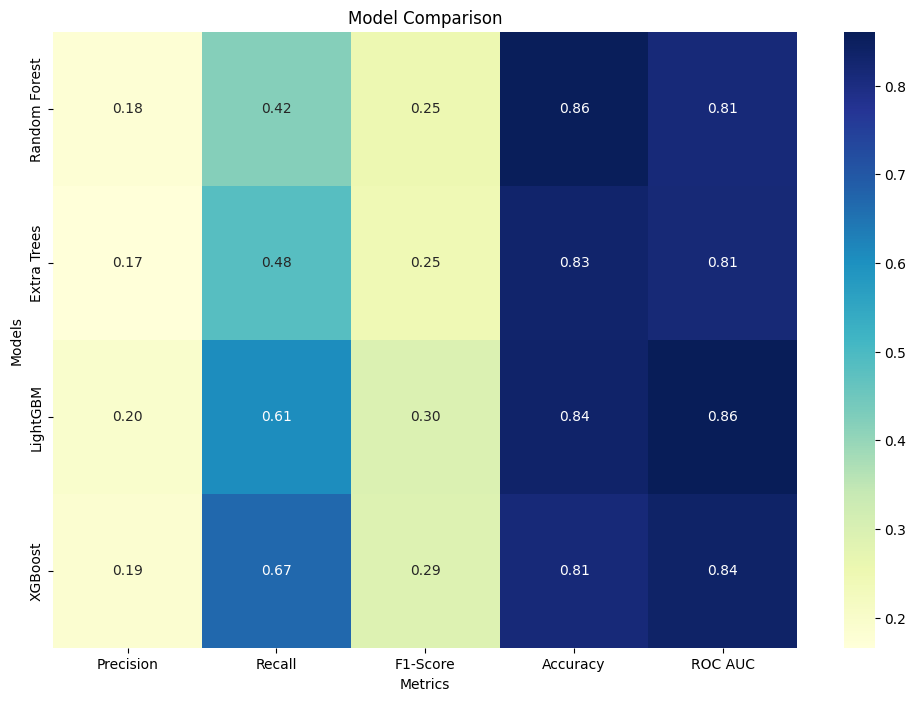

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
#Model Comparison
#for saving metrics for each model
comparison_results = {}


comparison_results['Random Forest'] = {
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_prob_rf)
}


comparison_results['Extra Trees'] = {
    'Precision': precision_score(y_test, y_pred_et),
    'Recall': recall_score(y_test, y_pred_et),
    'F1-Score': f1_score(y_test, y_pred_et),
    'Accuracy': accuracy_score(y_test, y_pred_et),
    'ROC AUC': roc_auc_score(y_test, y_prob_et)
}


comparison_results['LightGBM'] = {
    'Precision': precision_score(y_test, y_pred_lgb),
    'Recall': recall_score(y_test, y_pred_lgb),
    'F1-Score': f1_score(y_test, y_pred_lgb),
    'Accuracy': accuracy_score(y_test, y_pred_lgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_lgb)
}


comparison_results['XGBoost'] = {
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_xgb)
}


comparison_df = pd.DataFrame(comparison_results).T


print("Model Comparison:")
print(comparison_df)


plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Comparison")
plt.ylabel("Models")
plt.xlabel("Metrics")
plt.show()


Cross-validating: Random Forest
Random Forest -> F1 Scores: [0.65580737 0.98999473 0.99630217 0.99208443 0.99524564]
Random Forest -> Mean f1: 0.9259, Std f1: 0.1351
Cross-validating: Extra Trees
Extra Trees -> F1 Scores: [0.77827476 0.98273155 0.99209278 0.98788836 0.99367756]
Extra Trees -> Mean f1: 0.9469, Std f1: 0.0844
Cross-validating: LightGBM
LightGBM -> F1 Scores: [0.56534954 0.9978836  0.99893955 0.99787911 0.99894068]
LightGBM -> Mean f1: 0.9118, Std f1: 0.1732
Cross-validating: XGBoost
XGBoost -> F1 Scores: [0.56752656 0.99525066 0.99682203 0.99735029 0.99313259]
XGBoost -> Mean f1: 0.9100, Std f1: 0.1713

Cross-Validation Results:
               Mean f1  Std f1
Random Forest     0.93    0.14
Extra Trees       0.95    0.08
LightGBM          0.91    0.17
XGBoost           0.91    0.17


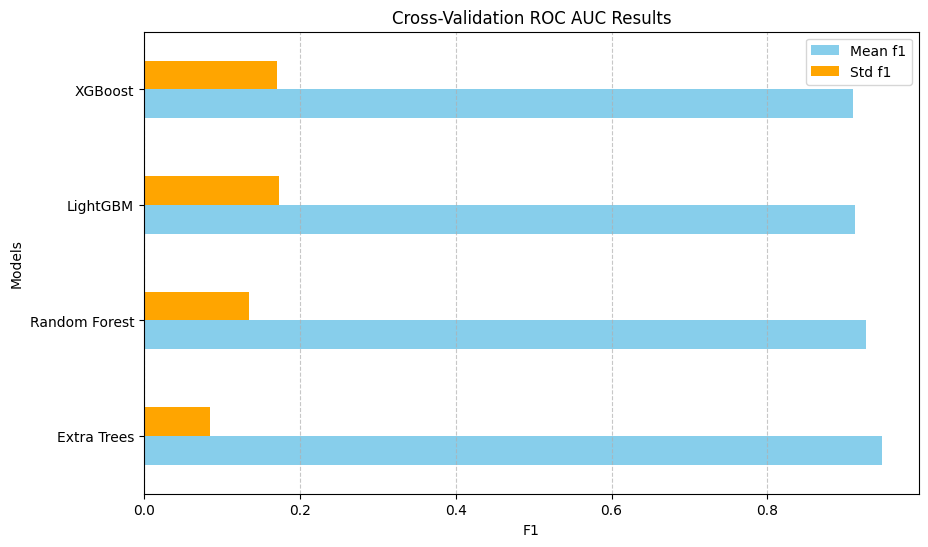

In [286]:
from sklearn.model_selection import cross_val_score
import numpy as np


models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced', **best_rf_params),
    "Extra Trees": ExtraTreesClassifier(random_state=42, class_weight='balanced', **best_et_params),
    "LightGBM": LGBMClassifier(random_state=42, **best_lgbm_params),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **best_xgb_params)
}


cv_results = {}
f1_scores = {}

cv_folds = 5

for model_name, model in models.items():
    print(f"Cross-validating: {model_name}")
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv_folds, scoring='f1', n_jobs=-1)
    f1_scores[model_name] = scores  
    print(f"{model_name} -> F1 Scores: {scores}")
    cv_results[model_name] = {
        "Mean f1": np.mean(scores),
        "Std f1": np.std(scores)
    }
    print(f"{model_name} -> Mean f1: {np.mean(scores):.4f}, Std f1: {np.std(scores):.4f}")


cv_results_df = pd.DataFrame(cv_results).T


print("\nCross-Validation Results:")
print(cv_results_df)


cv_results_df.sort_values("Mean f1", ascending=False, inplace=True)
cv_results_df.plot(kind='barh', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Cross-Validation ROC AUC Results")
plt.xlabel("F1")
plt.ylabel("Models")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [289]:
from scipy.stats import ttest_rel, f_oneway
import pandas as pd


f1_rf_scores = [0.64989518, 0.98764161, 0.99484536, 0.99171843, 0.99175258]
f1_et_scores = [0.78266332, 0.98407807, 0.99074074, 0.98658411, 0.98561151]
f1_lgbm_scores = [0.55255255, 0.99584631, 0.99637118, 0.99377593, 0.99740529]
f1_xgb_scores = [0.55146506, 0.9973999,  0.99635985, 0.99276112, 0.99532468]


f1_scores = {
    'Random Forest': f1_rf_scores,
    'Extra Trees': f1_et_scores,
    'LightGBM': f1_lgbm_scores,
    'XGBoost': f1_xgb_scores
}
results_df = pd.DataFrame(f1_scores)
print("Cross-Validation F1-Scores for Each Model:")
print(results_df)


anova_results = f_oneway(f1_rf_scores, f1_et_scores, f1_lgbm_scores, f1_xgb_scores)
print(f"\nANOVA Results: F-Statistic = {anova_results.statistic:.4f}, P-Value = {anova_results.pvalue:.4f}")


t_stat, p_value = ttest_rel(f1_rf_scores, f1_et_scores)
print(f"\nT-Test (Random Forest vs Extra Trees): T-Statistic = {t_stat:.4f}, P-Value = {p_value:.4f}")


Cross-Validation F1-Scores for Each Model:
   Random Forest  Extra Trees  LightGBM  XGBoost
0           0.65         0.78      0.55     0.55
1           0.99         0.98      1.00     1.00
2           0.99         0.99      1.00     1.00
3           0.99         0.99      0.99     0.99
4           0.99         0.99      1.00     1.00

ANOVA Results: F-Statistic = 0.0617, P-Value = 0.9792

T-Test (Random Forest vs Extra Trees): T-Statistic = -0.8277, P-Value = 0.4544


In [302]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_rf_params)
extra_trees_model = ExtraTreesClassifier(random_state=42, class_weight='balanced', **best_et_params)
lightgbm_model = LGBMClassifier(random_state=42, **best_lgbm_params)
best_xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **best_xgb_params)

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', random_forest_model),
        ('et', extra_trees_model),
        ('lgbm', lightgbm_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft', 
    weights=[1, 2, 4, 3] 
)

ensemble_model.fit(X_train_resampled, y_train_resampled)
y_pred_ensemble = ensemble_model.predict(X_test)

print("Confusion Matrix (Ensemble):")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nClassification Report (Ensemble):")
print(classification_report(y_test, y_pred_ensemble))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4720, number of negative: 9441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3673
[LightGBM] [Info] Number of data points in the train set: 14161, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333310 -> initscore=-0.693253
[LightGBM] [Info] Start training from score -0.693253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [306]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [
    ('rf', random_forest_model), 
    ('et', extra_trees_model), 
    ('lgbm', lightgbm_model), 
    ('xgb', best_xgb_model)
]

# Meta-model (e.g., Logistic Regression)
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    passthrough=False,  # If True, original features are concatenated with predictions
    cv=5  # Cross-validation for stacking
)

# Fit the stacking model on training data
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred_stacking = stacking_clf.predict(X_test)
print("Confusion Matrix (Stacking):")
print(confusion_matrix(y_test, y_pred_stacking))
print("\nClassification Report (Stacking):")
print(classification_report(y_test, y_pred_stacking))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4720, number of negative: 9441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3673
[LightGBM] [Info] Number of data points in the train set: 14161, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333310 -> initscore=-0.693253
[LightGBM] [Info] Start training from score -0.693253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Model Comparison:
               Precision  Recall  F1-Score  Accuracy  ROC AUC
Random Forest       0.18    0.42      0.25      0.86     0.81
Extra Trees         0.17    0.48      0.25      0.83     0.81
LightGBM            0.20    0.61      0.30      0.84     0.86
XGBoost             0.19    0.67      0.29      0.81     0.84
Ensemble            0.20    0.48      0.28      0.86     0.85
Stacking            0.21    0.16      0.18      0.92     0.81


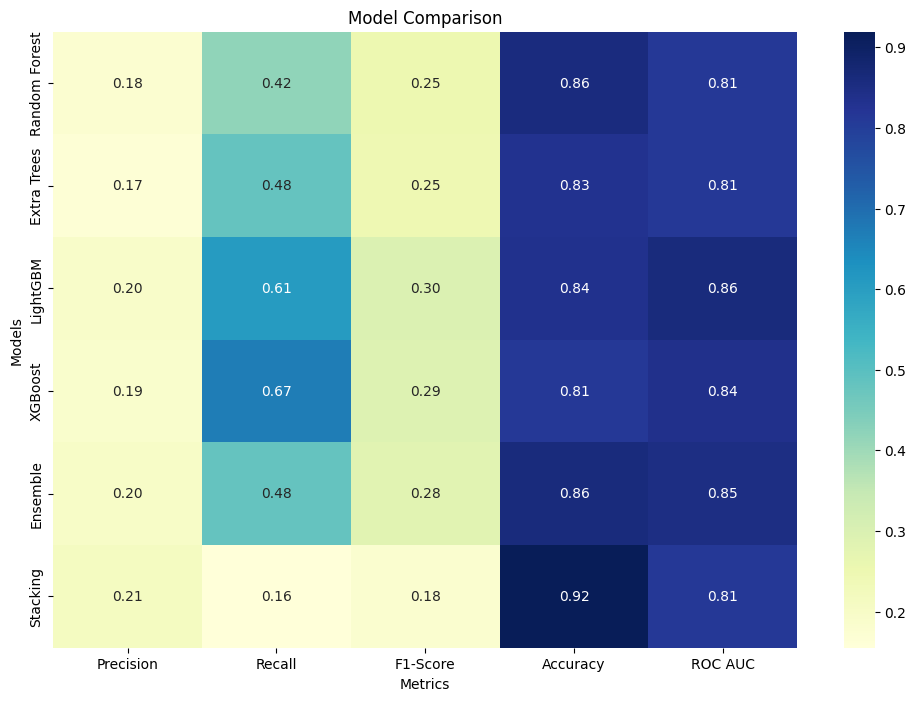

In [307]:
# Compare Voting and Stacking with individual models

y_prob_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
y_pred_ensemble = (y_prob_ensemble >= optimal_threshold).astype(int)

y_prob_stacking = stacking_clf.predict_proba(X_test)[:, 1]
y_pred_stacking = (y_prob_stacking >= optimal_threshold).astype(int)


comparison_results = {}


comparison_results['Random Forest'] = {
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_prob_rf)
}


comparison_results['Extra Trees'] = {
    'Precision': precision_score(y_test, y_pred_et),
    'Recall': recall_score(y_test, y_pred_et),
    'F1-Score': f1_score(y_test, y_pred_et),
    'Accuracy': accuracy_score(y_test, y_pred_et),
    'ROC AUC': roc_auc_score(y_test, y_prob_et)
}


comparison_results['LightGBM'] = {
    'Precision': precision_score(y_test, y_pred_lgb),
    'Recall': recall_score(y_test, y_pred_lgb),
    'F1-Score': f1_score(y_test, y_pred_lgb),
    'Accuracy': accuracy_score(y_test, y_pred_lgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_lgb)
}


comparison_results['XGBoost'] = {
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_xgb)
}

comparison_results['Ensemble'] = {
    'Precision': precision_score(y_test, y_pred_ensemble),
    'Recall': recall_score(y_test, y_pred_ensemble),
    'F1-Score': f1_score(y_test, y_pred_ensemble),
    'Accuracy': accuracy_score(y_test, y_pred_ensemble),
    'ROC AUC': roc_auc_score(y_test, y_prob_ensemble)
}

comparison_results['Stacking'] = {
    'Precision': precision_score(y_test, y_pred_stacking),
    'Recall': recall_score(y_test, y_pred_stacking),
    'F1-Score': f1_score(y_test, y_pred_stacking),
    'Accuracy': accuracy_score(y_test, y_pred_stacking),
    'ROC AUC': roc_auc_score(y_test, y_prob_stacking)
}


comparison_df = pd.DataFrame(comparison_results).T


print("Model Comparison:")
print(comparison_df)


plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Comparison")
plt.ylabel("Models")
plt.xlabel("Metrics")
plt.show()
